## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- Remove the # in the line below. Run only once for each computer!
![image.png](attachment:5a0e0d97-4380-4cb2-bf26-d0ab6ee7458a.png)

In [1]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/v.0.23.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.23'

## Extracting metadata

In [3]:
 # Path to metadata files for Ne. Easier to have in subfolder
meta_path=r'/Users/kyledayton/Downloads/09.15.22 Spectra and Text Files/Text Files 09.15.22'
spectra_path=r'/Users/kyledayton/Downloads/09.15.22 Spectra and Text Files/Spectra 09.15.22/09.15.22 NE Part 1 Spectra'

# Find files


# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext_meta='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
 # Leave as none unless witec appended a number
Ne_files_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

Ne_files_meta


['NE 1.txt',
 'NE 10.txt',
 'NE 11.txt',
 'NE 12.txt',
 'NE 13.txt',
 'NE 14.txt',
 'NE 15.txt',
 'NE 16.txt',
 'NE 17.txt',
 'NE 18.txt',
 'NE 19.txt',
 'NE 2.txt',
 'NE 20.txt',
 'NE 21.txt',
 'NE 22.txt',
 'NE 23.txt',
 'NE 24.txt',
 'NE 25.txt',
 'NE 26.txt',
 'NE 27.txt',
 'NE 28.txt',
 'NE 29.txt',
 'NE 3.txt',
 'NE 30.txt',
 'NE 31.txt',
 'NE 32.txt',
 'NE 33.txt',
 'NE 34.txt',
 'NE 35.txt',
 'NE 36.txt',
 'NE 37.txt',
 'NE 38.txt',
 'NE 39.txt',
 'NE 4.txt',
 'NE 40.txt',
 'NE 41.txt',
 'NE 42.txt',
 'NE 43.txt',
 'NE 44.txt',
 'NE 45.txt',
 'NE 46.txt',
 'NE 47.txt',
 'NE 48.txt',
 'NE 49.txt',
 'NE 5.txt',
 'NE 50.txt',
 'NE 51.txt',
 'NE 52.txt',
 'NE 53.txt',
 'NE 54.txt',
 'NE 55.txt',
 'NE 56.txt',
 'NE 57.txt',
 'NE 58.txt',
 'NE 59.txt',
 'NE 6.txt',
 'NE 7.txt',
 'NE 8.txt',
 'NE 9.txt']

In [4]:
## Image file says Video Image

In [5]:
# Extract useful metadata from each file
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=Ne_files_meta, prefix=False, trupower=True)
meta.head()

100%|█████████████████████████████████████████| 59/59 [00:00<00:00, 1632.05it/s]

Done


filename                  date  power (mW)  Int_time (s)  accumulations  \
0   NE 1.txt  September 15, 2022\n       4.993          45.0            3.0   
11  NE 2.txt  September 15, 2022\n       4.992          45.0            3.0   
22  NE 3.txt  September 15, 2022\n       4.991          45.0            3.0   
33  NE 4.txt  September 15, 2022\n       4.990          45.0            3.0   
44  NE 5.txt  September 15, 2022\n       4.996          45.0            3.0   

    Mag (X)             duration      24hr_time  sec since midnight  \
0      50.0  ['0h', '2m', '17s']  11:14:52 AM\n             40492.0   
11     50.0  ['0h', '2m', '17s']  11:22:46 AM\n             40966.0   
22     50.0  ['0h', '2m', '17s']  11:30:38 AM\n             41438.0   
33    100.0  ['0h', '2m', '17s']  11:37:41 AM\n             41861.0   
44    100.0  ['0h', '2m', '17s']  11:48:29 AM\n             42509.0   

    Spectral Center  index  
0          1324.929      0  
11         1324.929     11  
22         1324.929     22  
33         1324.929     33  
44         1324.929     44

## Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [6]:
wavelength =532.067 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=2000)
df_Ne.head()

Raman_shift (cm-1)  Intensity  Ne emission line in air
1           817.957694     5000.0                556.27662
9          1116.345158     5000.0                565.66588
16         1309.738376     5000.0                571.92248
19         1398.173304     5000.0                574.82985
23         1446.822793     7000.0                576.44188

## Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for the line shift you have written down

In [7]:
line_1=1117
line_2=1447
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=line_1, line2_shift=line_2,
                                     cut_off_intensity=2000)
ideal_split

Ne_Split       Line_1       Line_2  Entered Pos Line 1  \
0  330.477634  1116.345158  1446.822793                1117   

   Entered Pos Line 2  
0                1447

## Find your Ne spectra files

In [8]:
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
prefix=True # Leave as none unless witec appended a number
Ne_files=pf.get_Ne_files(path=spectra_path, file_ext=file_ext, ID_str=ID_str, exclude_str=exclude_str, sort=True)

In [9]:
Ne_files

['001 NE 1.txt',
 '003 NE 2.txt',
 '005 NE 3.txt',
 '007 NE 4.txt',
 '009 NE 5.txt',
 '011 NE 6.txt',
 '013 NE 7.txt',
 '015 NE 8.txt',
 '017 NE 9.txt',
 '019 NE 10.txt',
 '021 NE 11.txt',
 '023 NE 12.txt',
 '025 NE 13.txt',
 '027 NE 14.txt',
 '029 NE 15.txt',
 '031 NE 16.txt',
 '033 NE 17.txt',
 '035 NE 18.txt',
 '037 NE 19.txt',
 '040 NE 20.txt',
 '042 NE 21.txt',
 '044 NE 22.txt',
 '046 NE 23.txt',
 '048 NE 24.txt',
 '050 NE 25.txt',
 '052 NE 26.txt',
 '054 NE 27.txt',
 '056 NE 28.txt',
 '058 NE 29.txt',
 '060 NE 30.txt',
 '062 NE 31.txt']

## Select the first file you want to fit
- You can either do this numerically, or by specifiying the filename between ''

In [10]:
filename=Ne_files[0]  # Or you could put a string here, like 'NE1.txt' 

## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook

Biggest 6 peaks:


pos        height
50  1447.878781  19024.666020
43  1399.406110   6107.333496
62  1567.514917   4541.000000
11  1118.069988   2503.000000
24  1220.505213   1804.000000
31  1311.278432   1633.333374

selected Peak 1 Pos
1118.069988
selected Peak 2 Pos
1447.878781


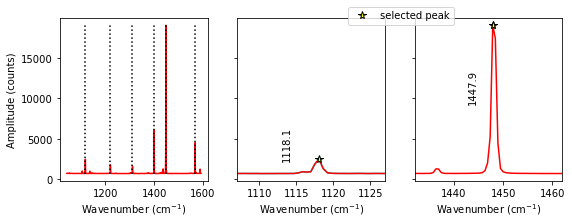

In [11]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=line_1 # approximate position of the 1st line you are interested in
peak2_cent=line_2 # Approximate position of the 2nd line you are interested in


Ne, df_sort_Ne_trim, nearest_pk1, nearest_pk2=pf.plot_Ne_lines(path=spectra_path, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## You can tweak parameters here
- The default parameters may work, you can see what those are here:
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min) if you are fitting the 1117 line as you need 2 peaks
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override
- See figure from Penny for what these parameters actually are

In [12]:
pf.Ne_peak_config()

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), x_range_baseline=20, y_range_baseline=200, pk1_amplitude=100, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

- You can also overwrite any of these, the most likely things you'll want to overwrite are the background positions, or the amplitude

In [13]:
Ne_Config=pf.Ne_peak_config(pk1_amplitude=40, pk2_amplitude=100, LH_offset_mini=[2, 5], 
lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10], N_poly_pk2_baseline=2 )
Ne_Config

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=2, lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70], lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40], x_range_baseline=20, y_range_baseline=200, pk1_amplitude=40, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

filename  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  error_pk2  \
0       NE    1448.115895   26474.357007   0.241144   0.241144    0.00325   

   pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  error_pk1     deltaNe  \
0    1117.922601    2496.836472    0.27583    0.27583        NaN  330.193293   

    Ne_Corr  Ne_Corr_min  Ne_Corr_max  residual_pk2  residual_pk1  \
0  1.000861          NaN          NaN     99.329947      21.97379   

   residual_pk1+pk2  
0        121.303738

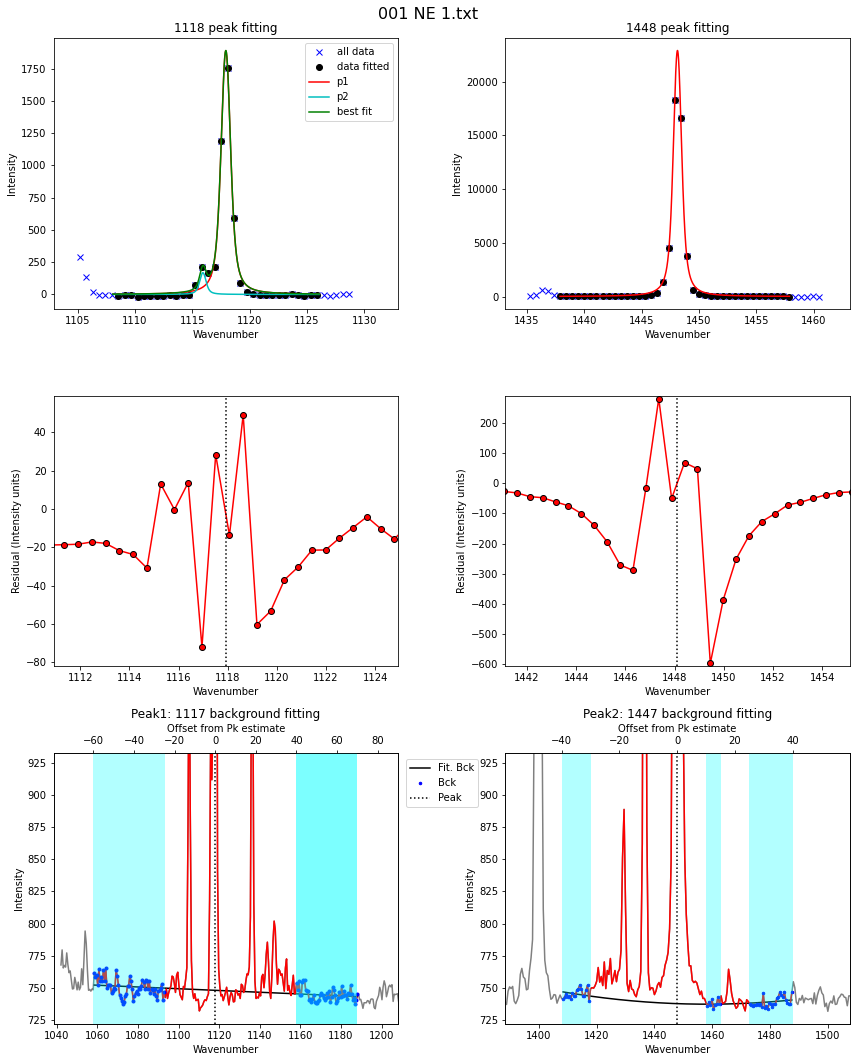

In [14]:
# You also need to set whether you want 1 peak or 2 for the LH diad
peaks_1=2

df_test=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=spectra_path, prefix=prefix,
    Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
    DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
display(df_test)

## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [15]:
len(Ne_files)

31

 65%|███████████████████████████▋               | 20/31 [00:16<00:08,  1.37it/s]/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/DiadFit/ne_lines.py:916: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ((ax3, ax2), (ax5, ax4), (ax1, ax0)) = plt.subplots(3,2, figsize = (12,15)) # adjust dimensions of figure here
100%|███████████████████████████████████████████| 31/31 [00:24<00:00,  1.27it/s]


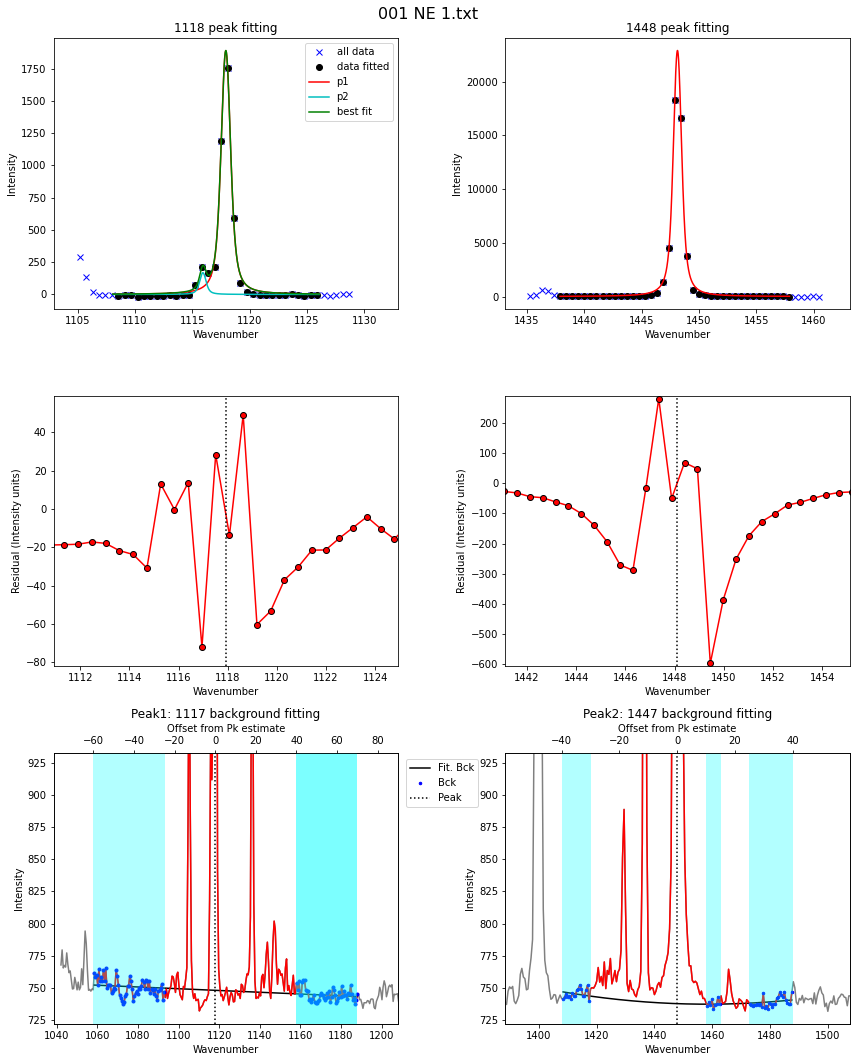

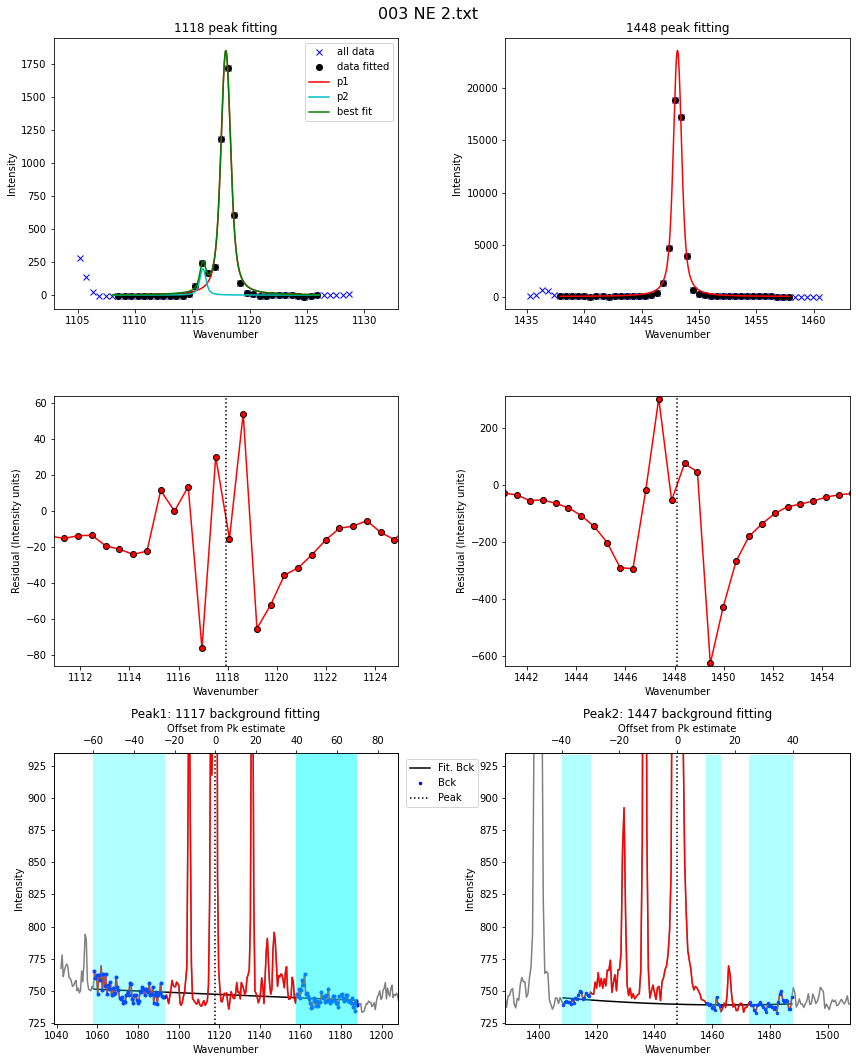

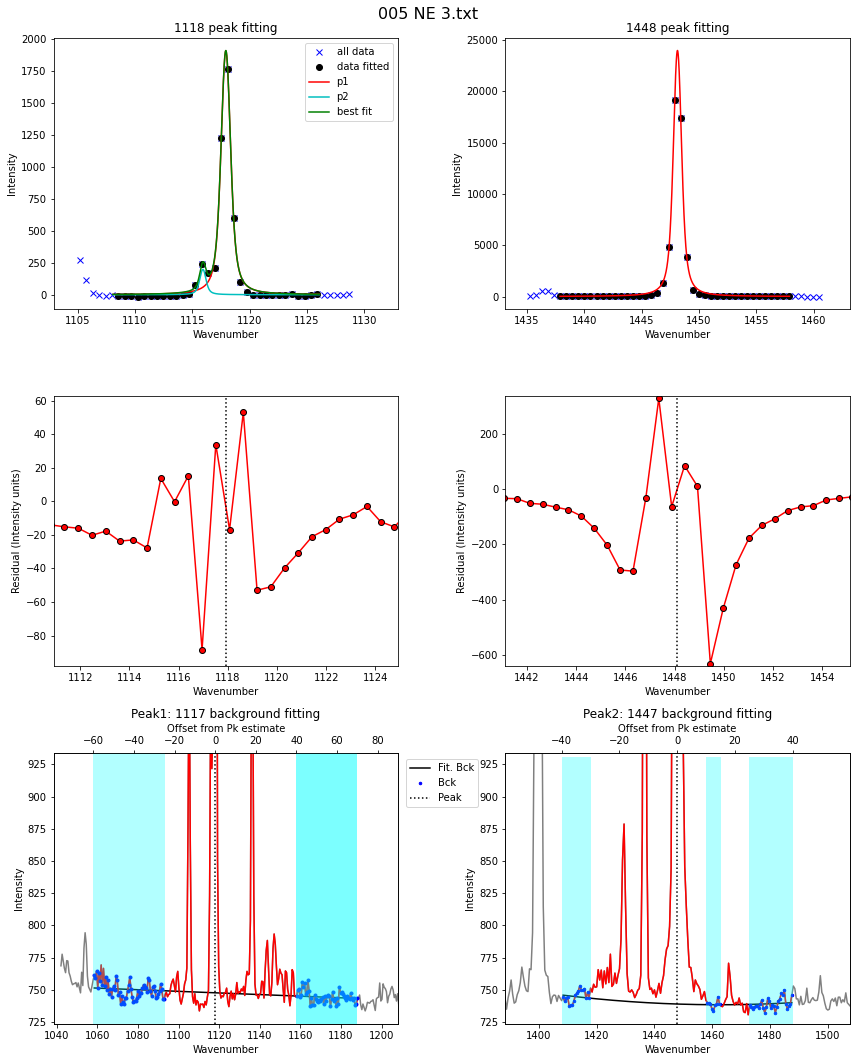

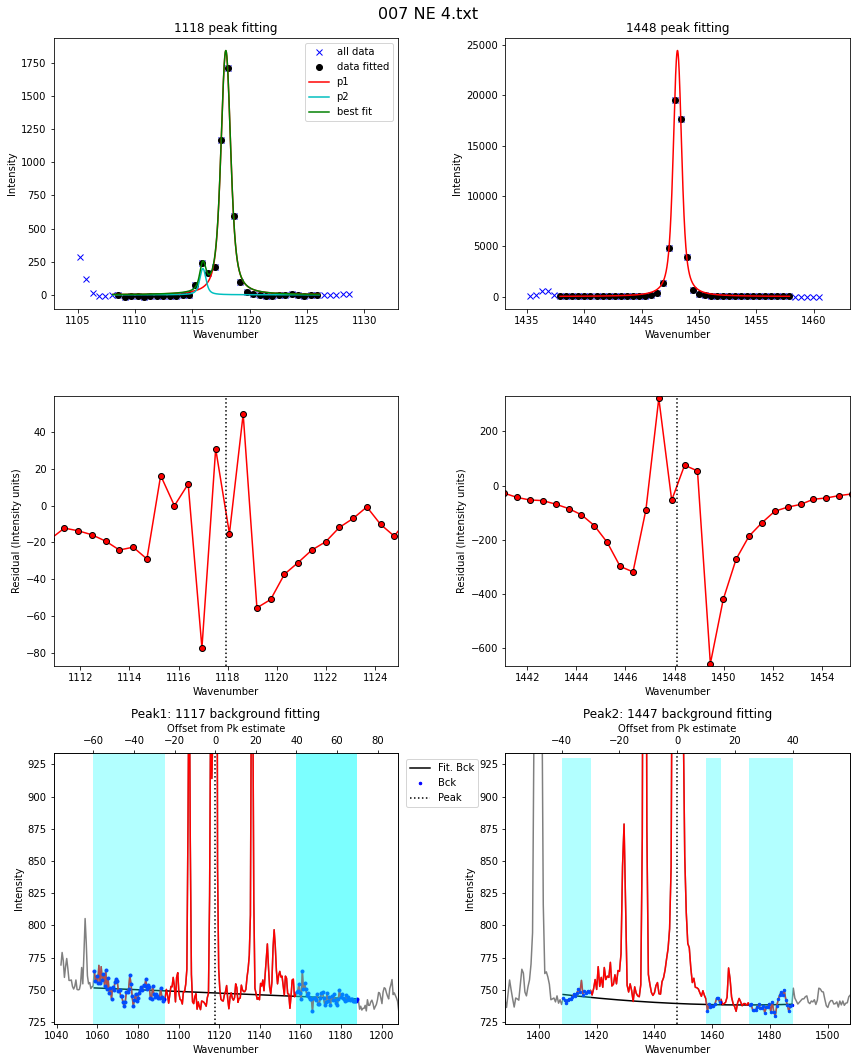

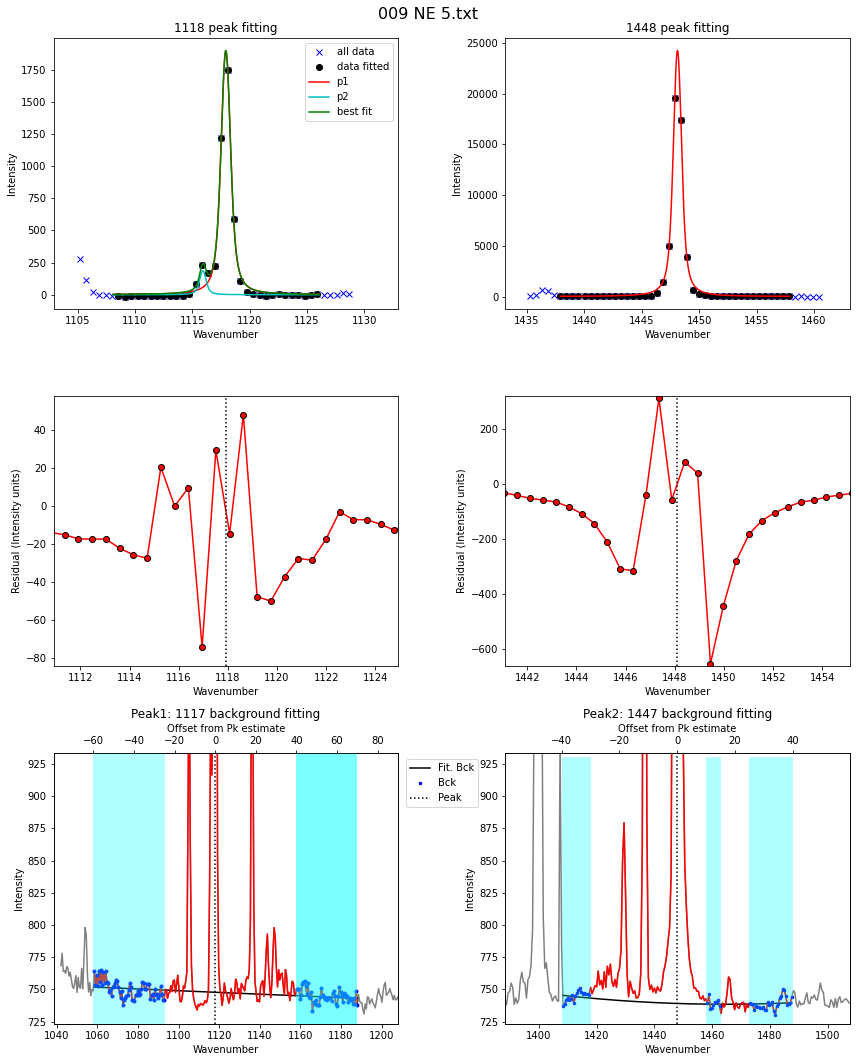

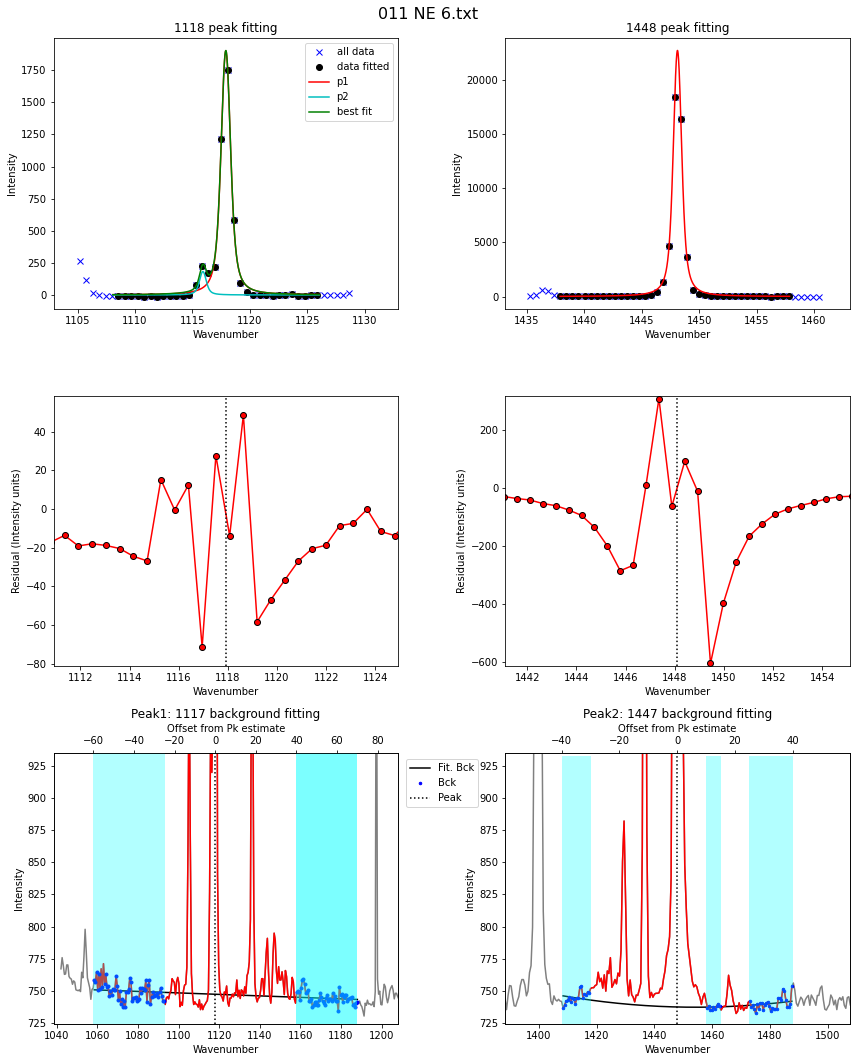

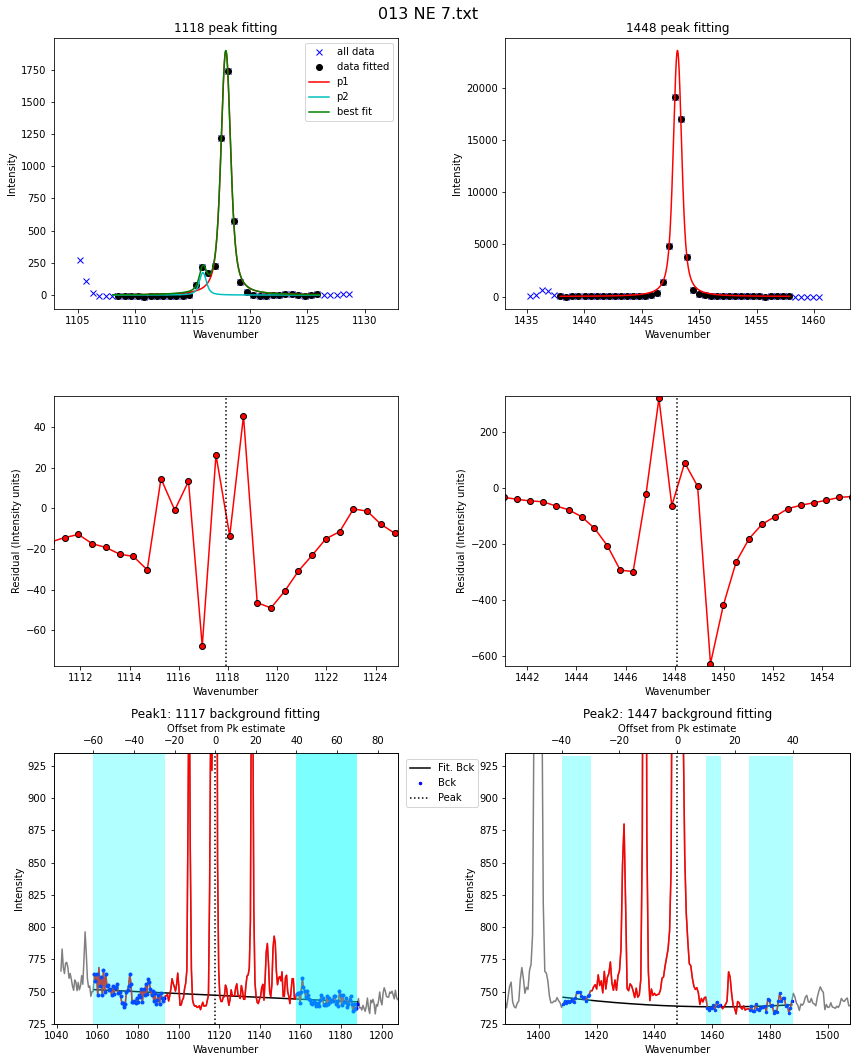

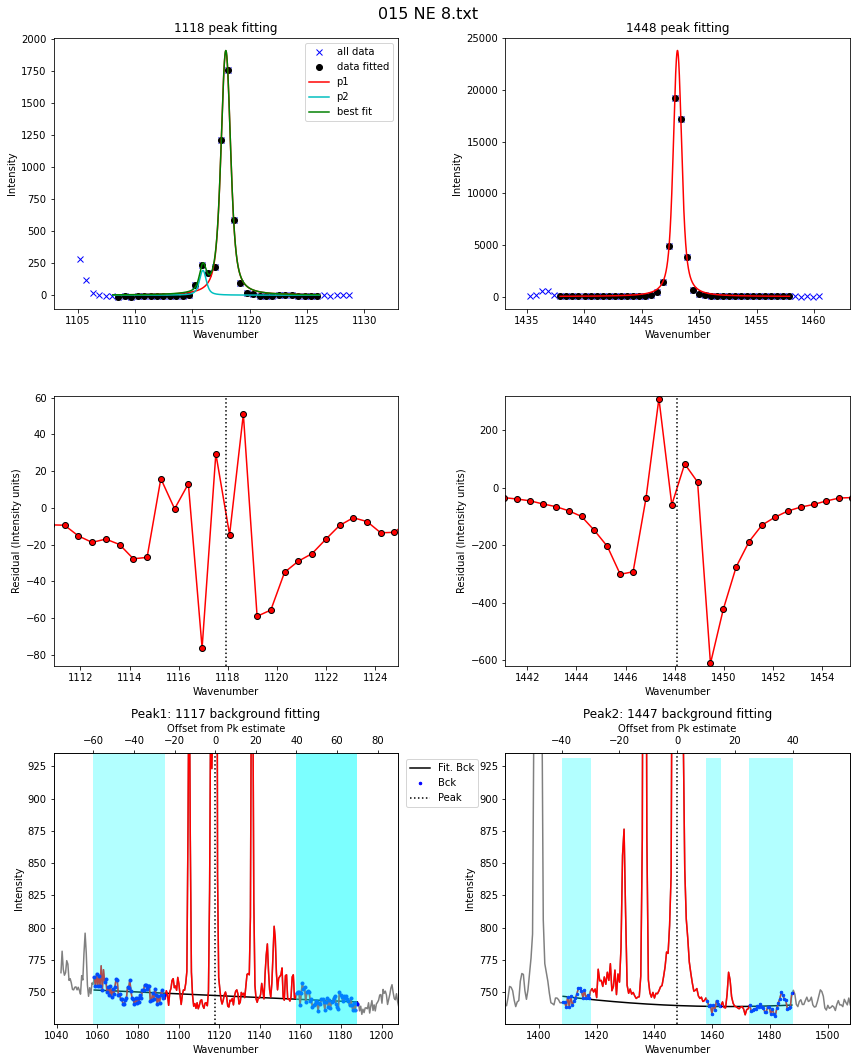

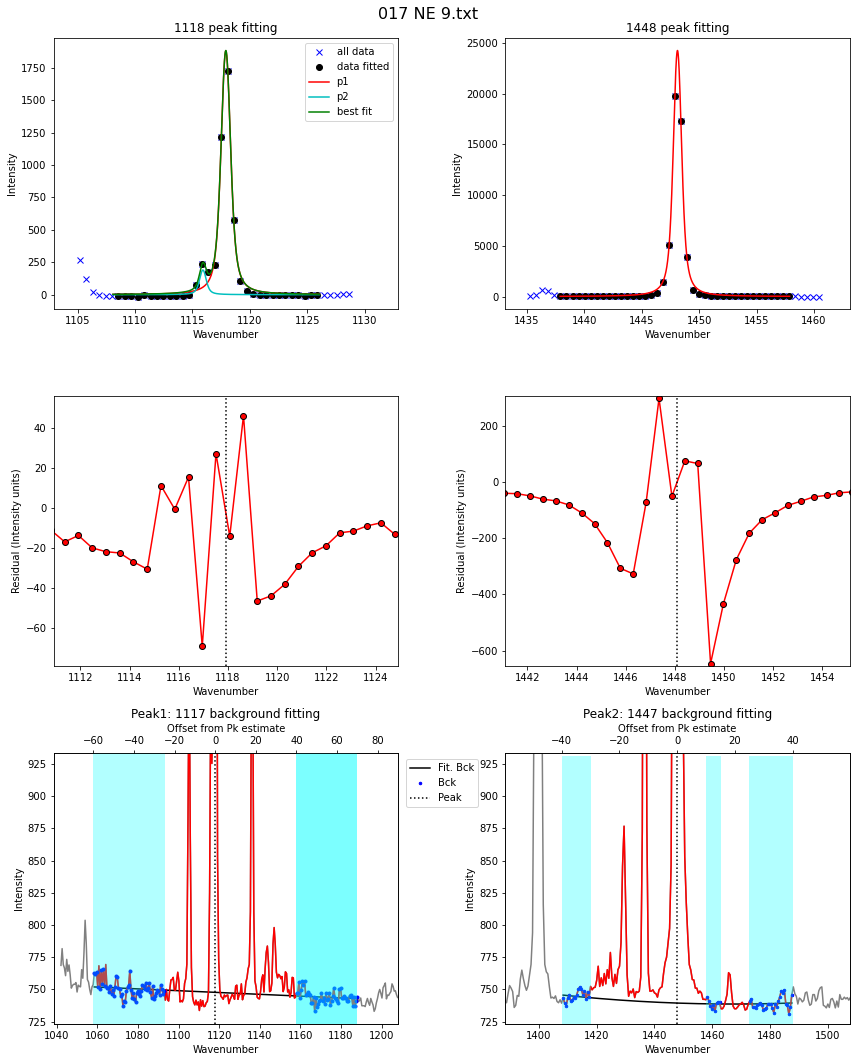

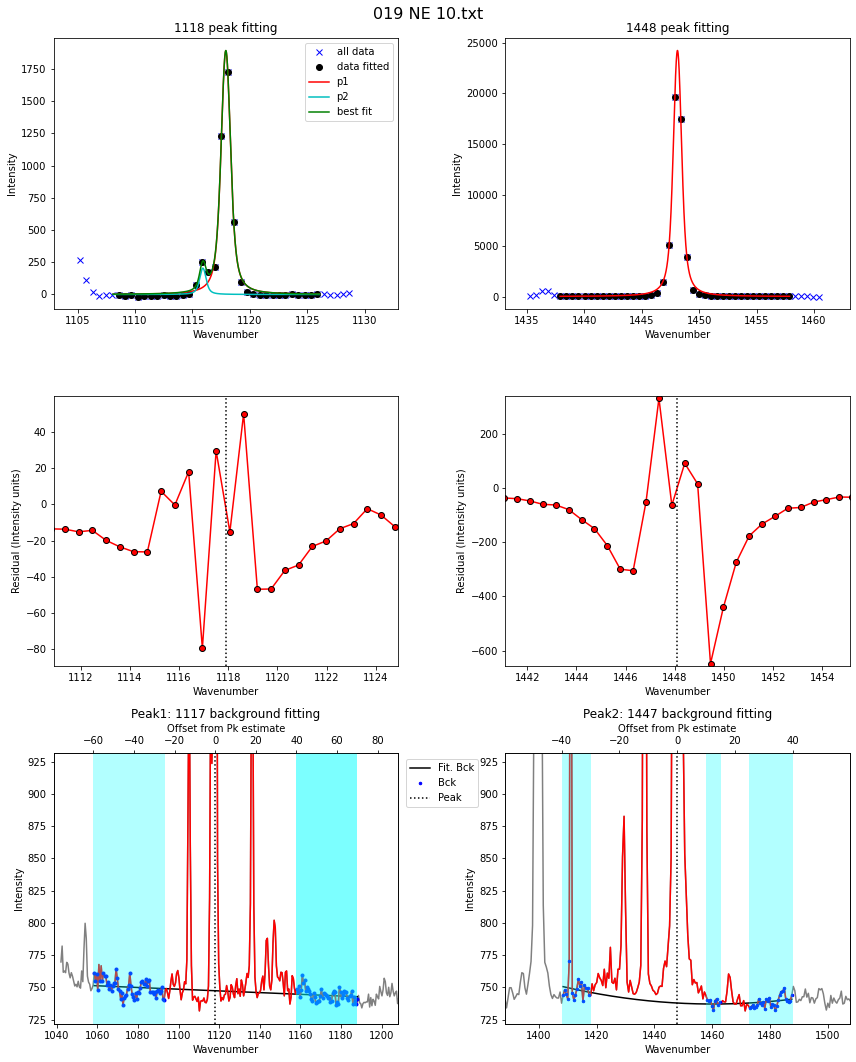

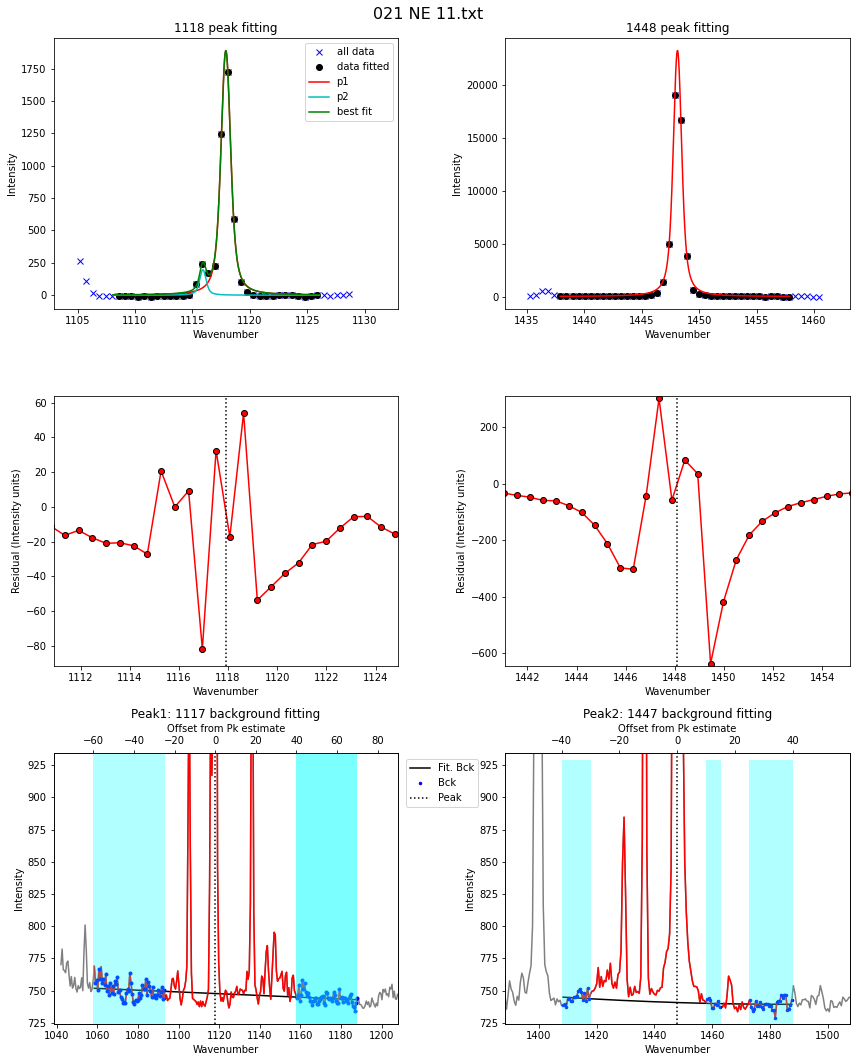

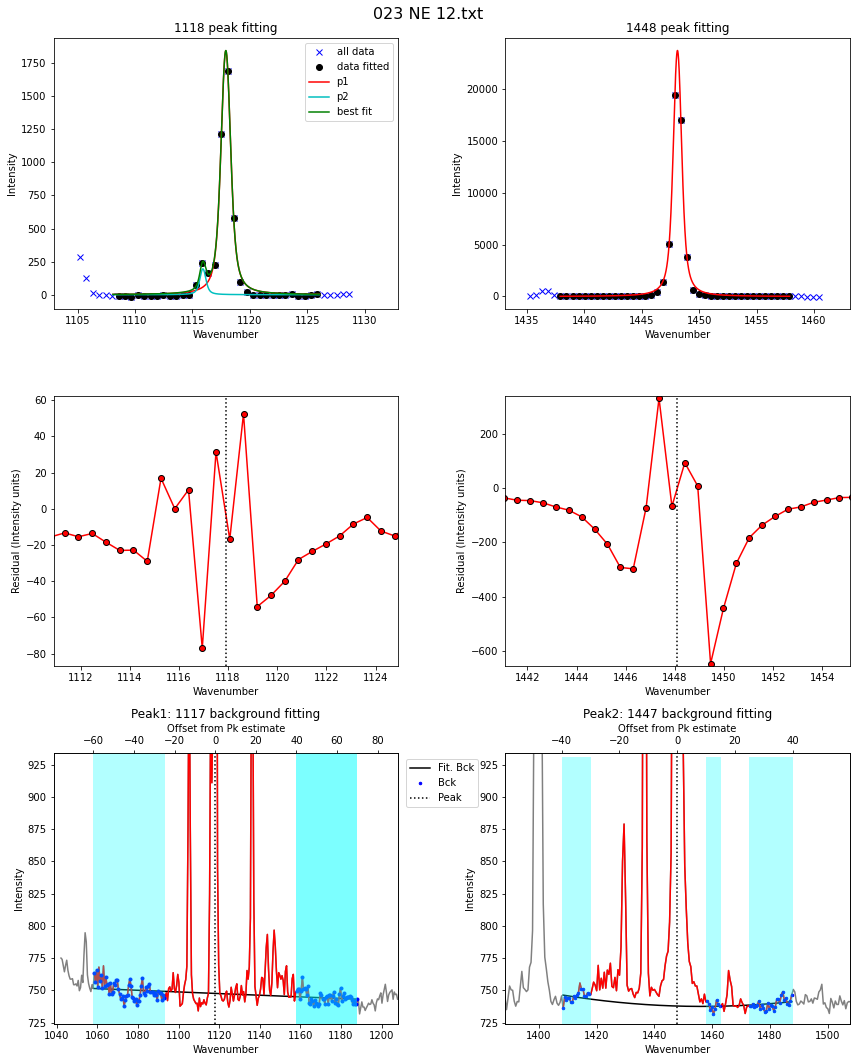

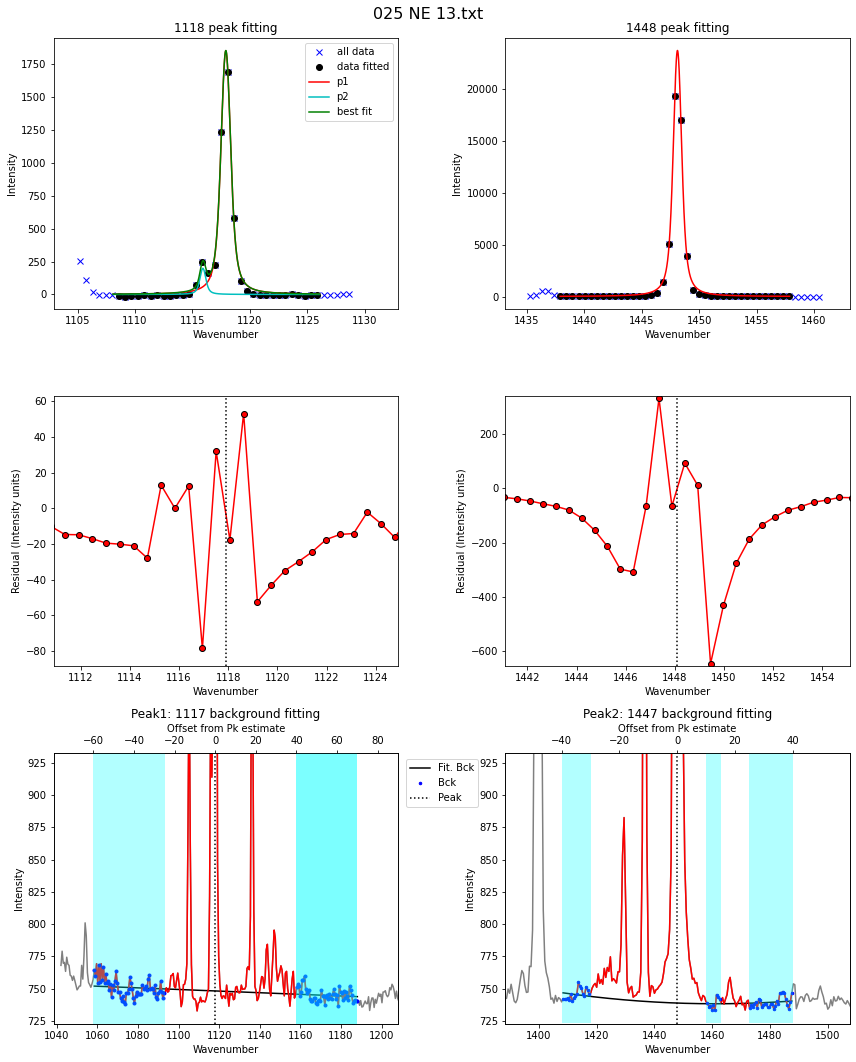

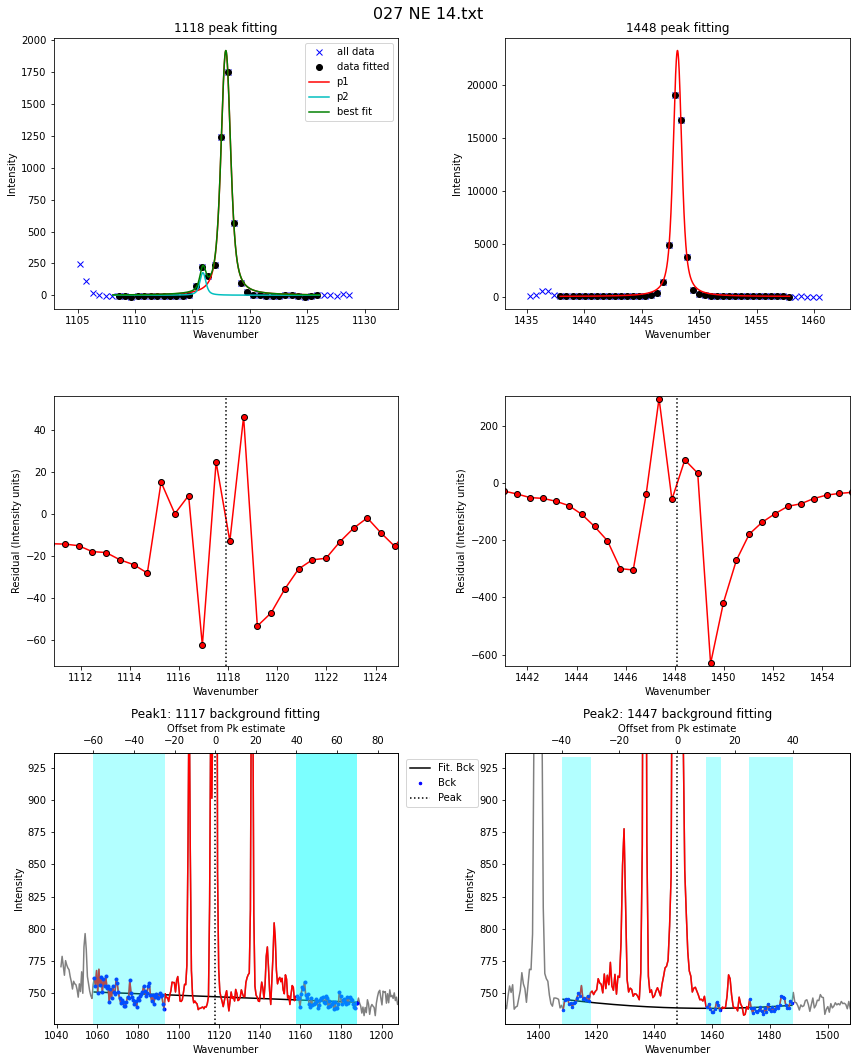

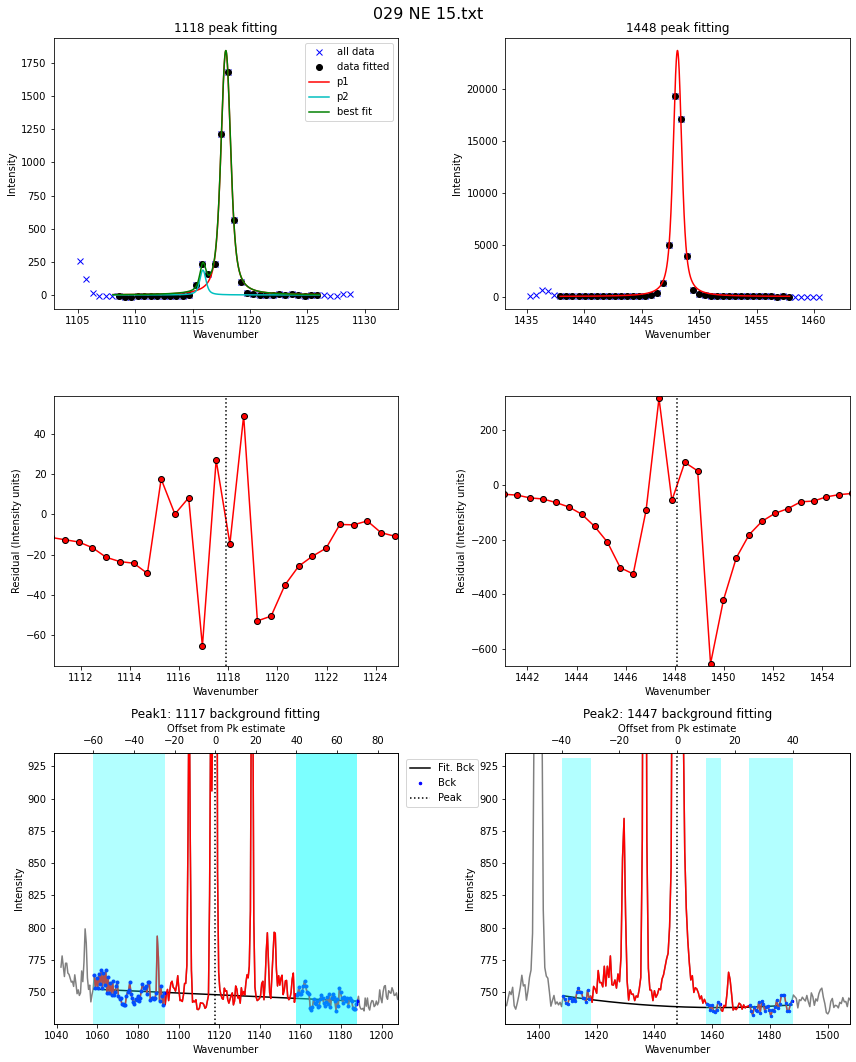

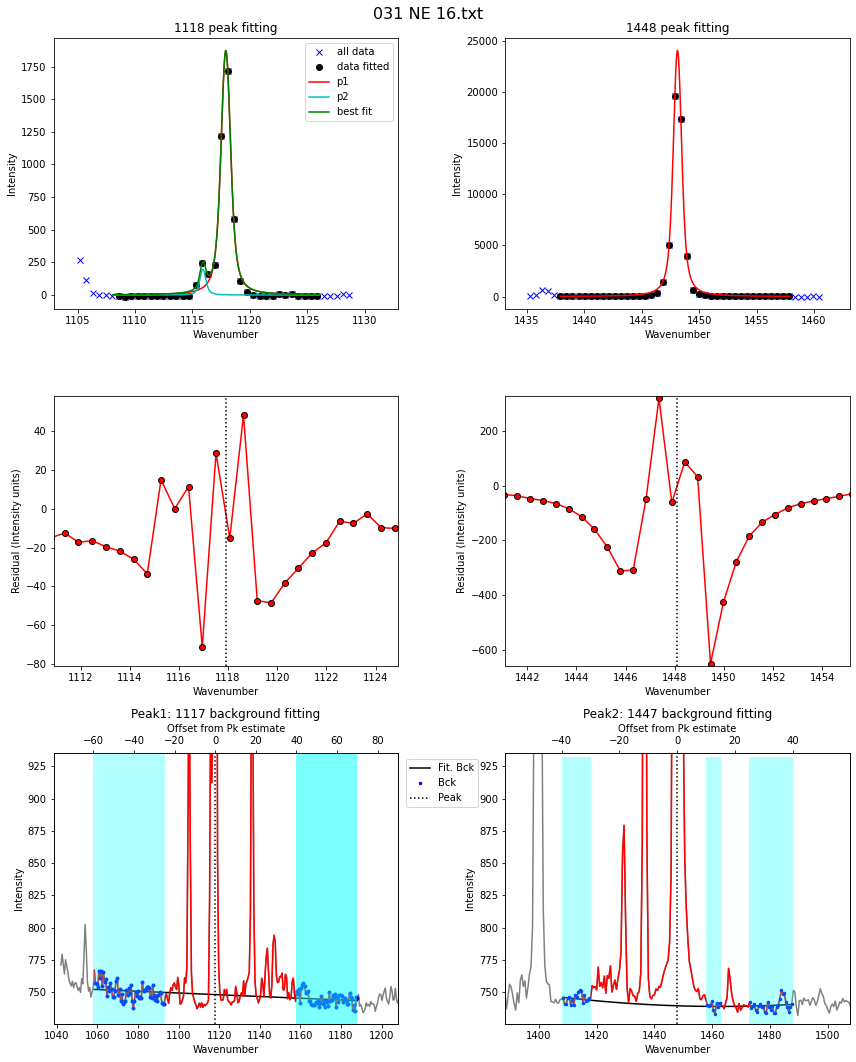

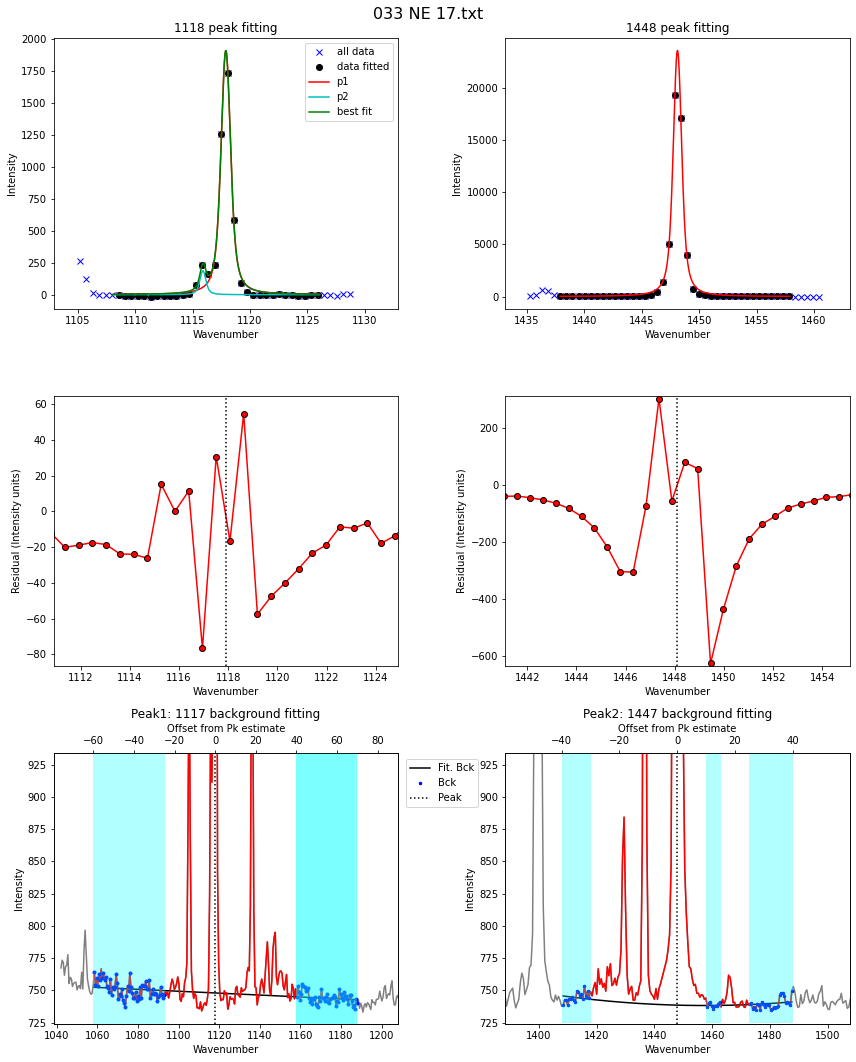

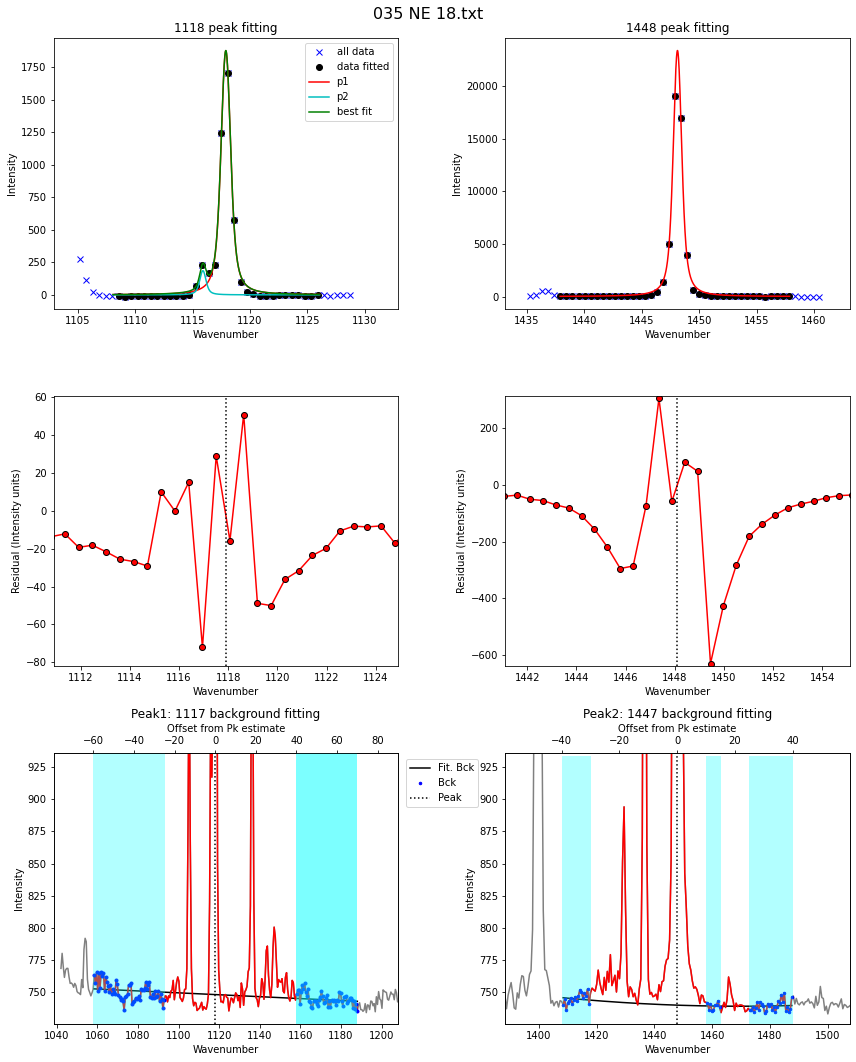

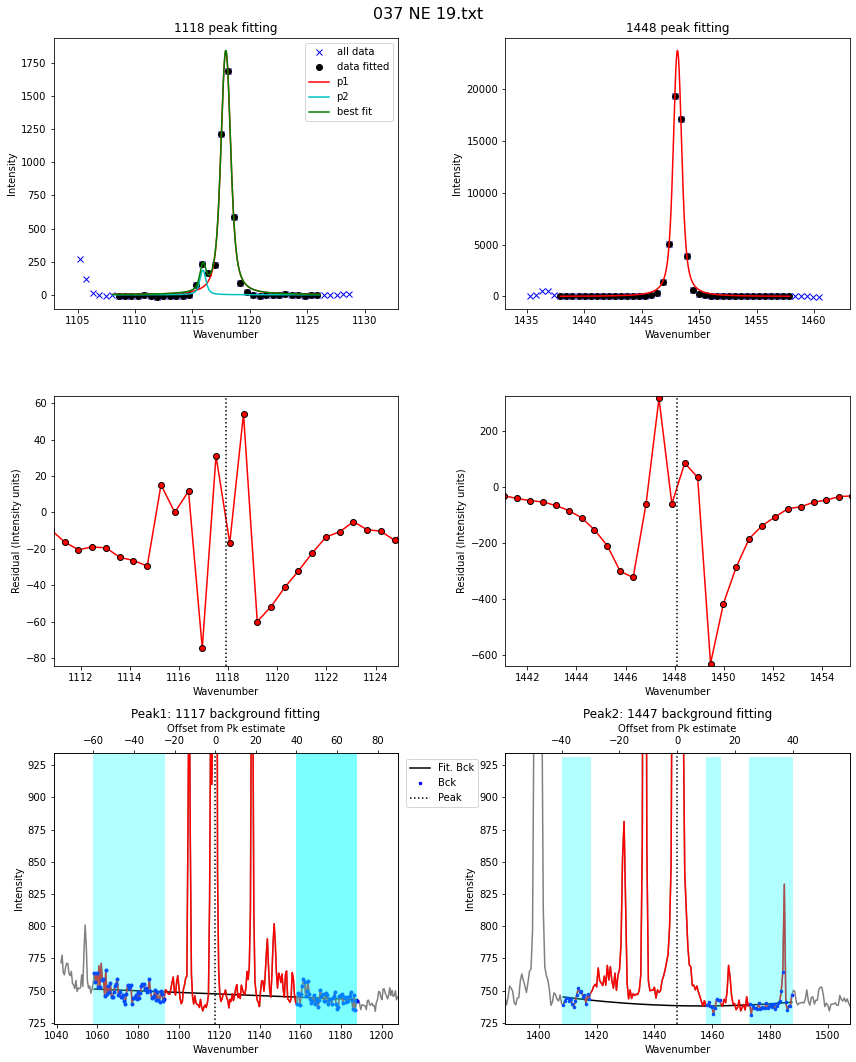

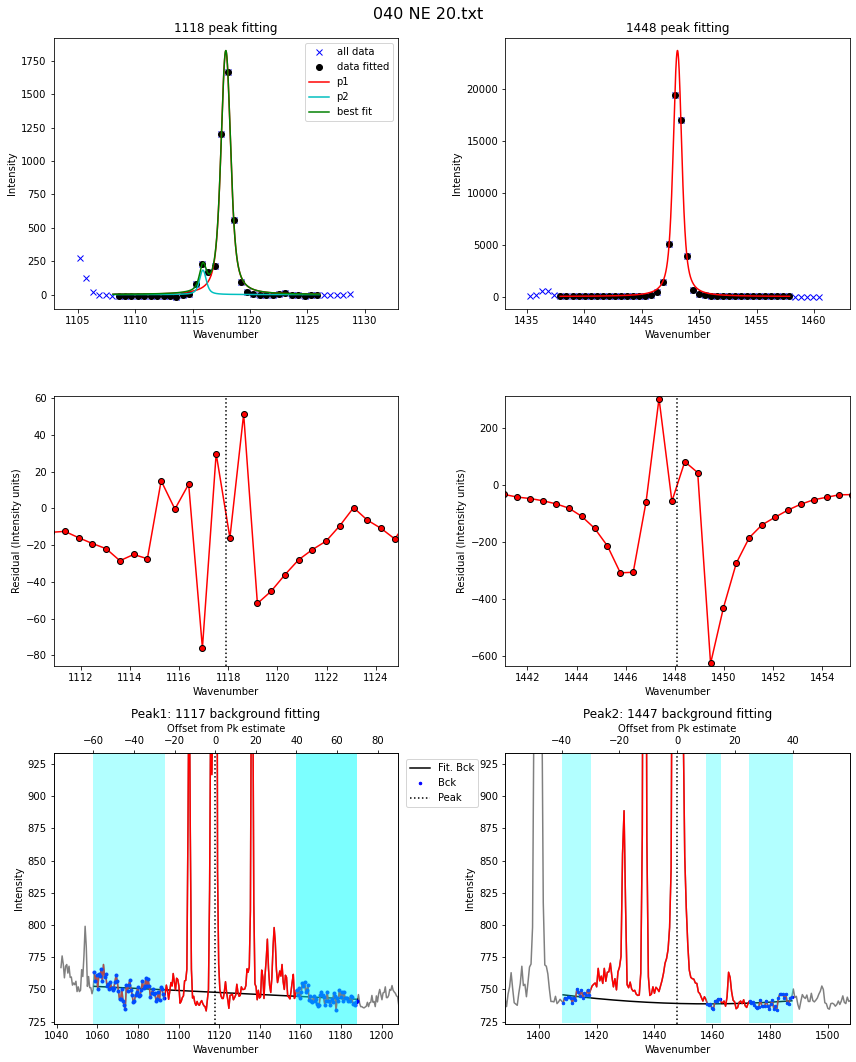

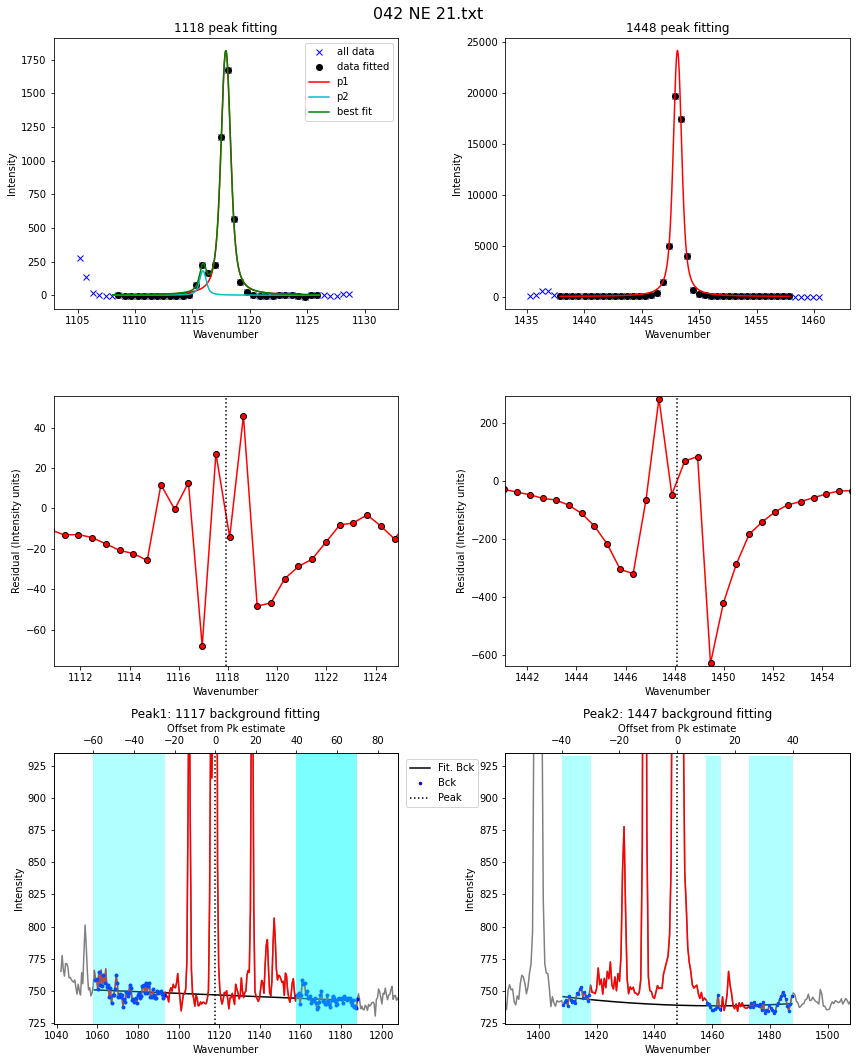

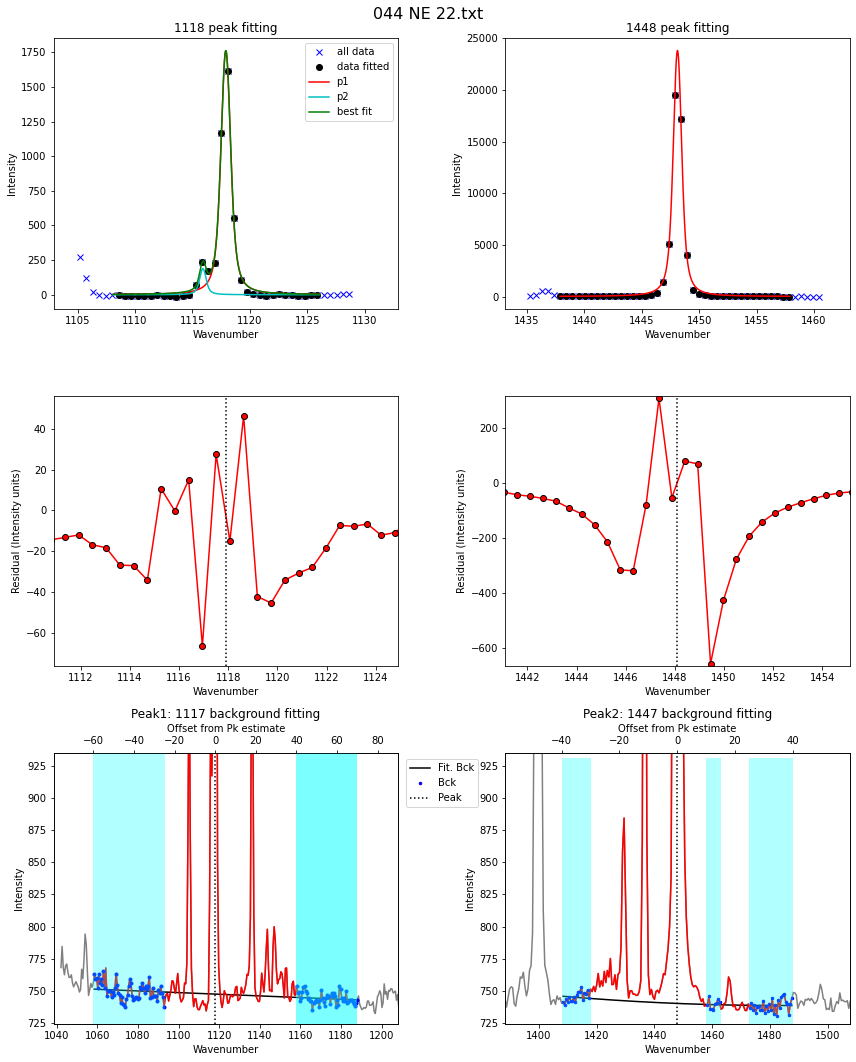

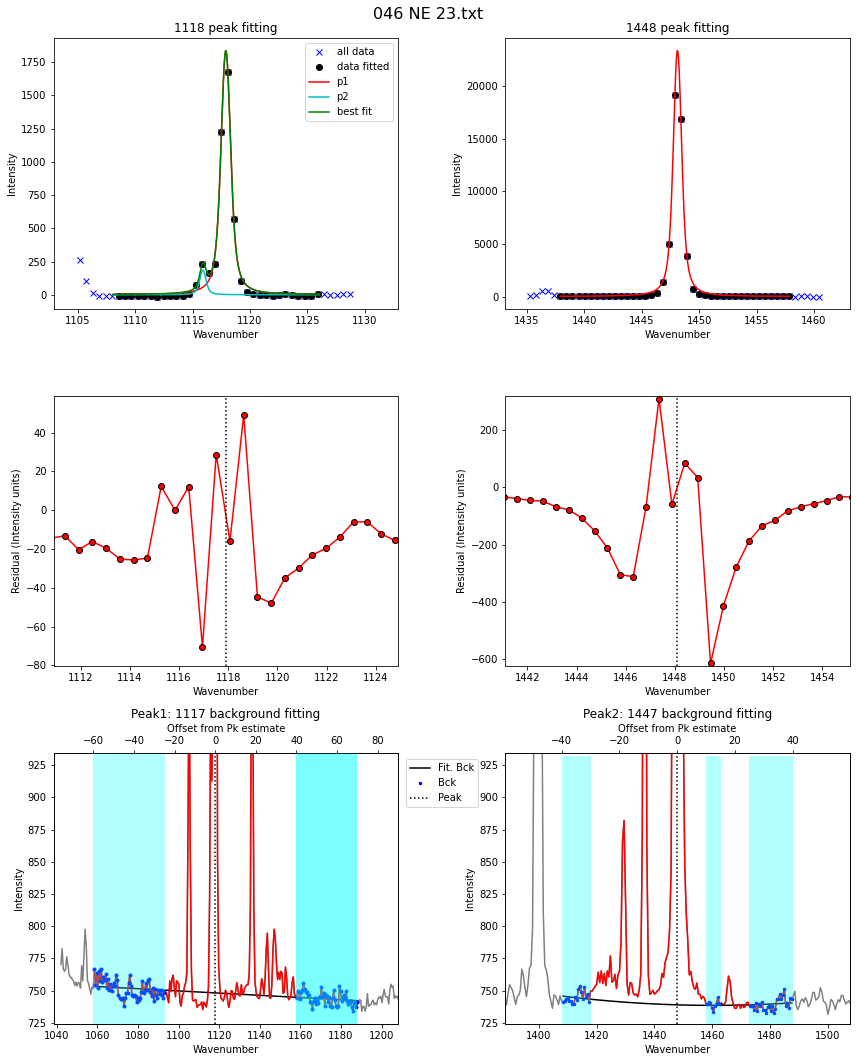

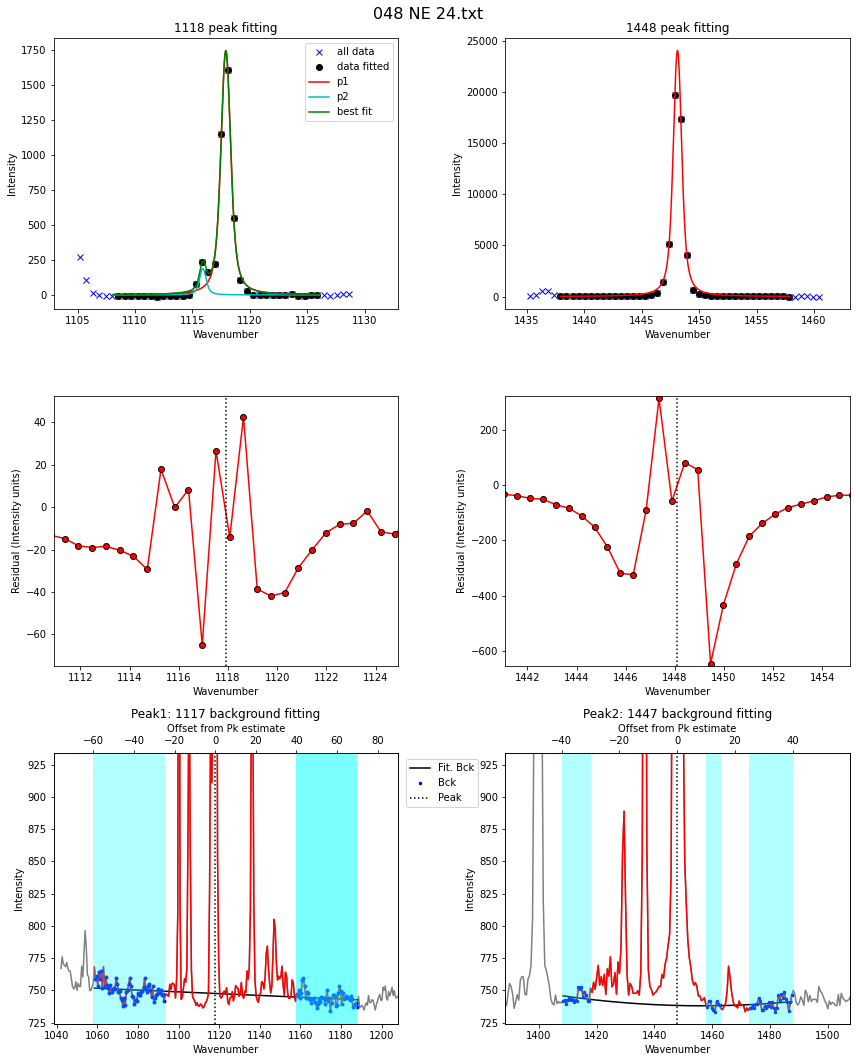

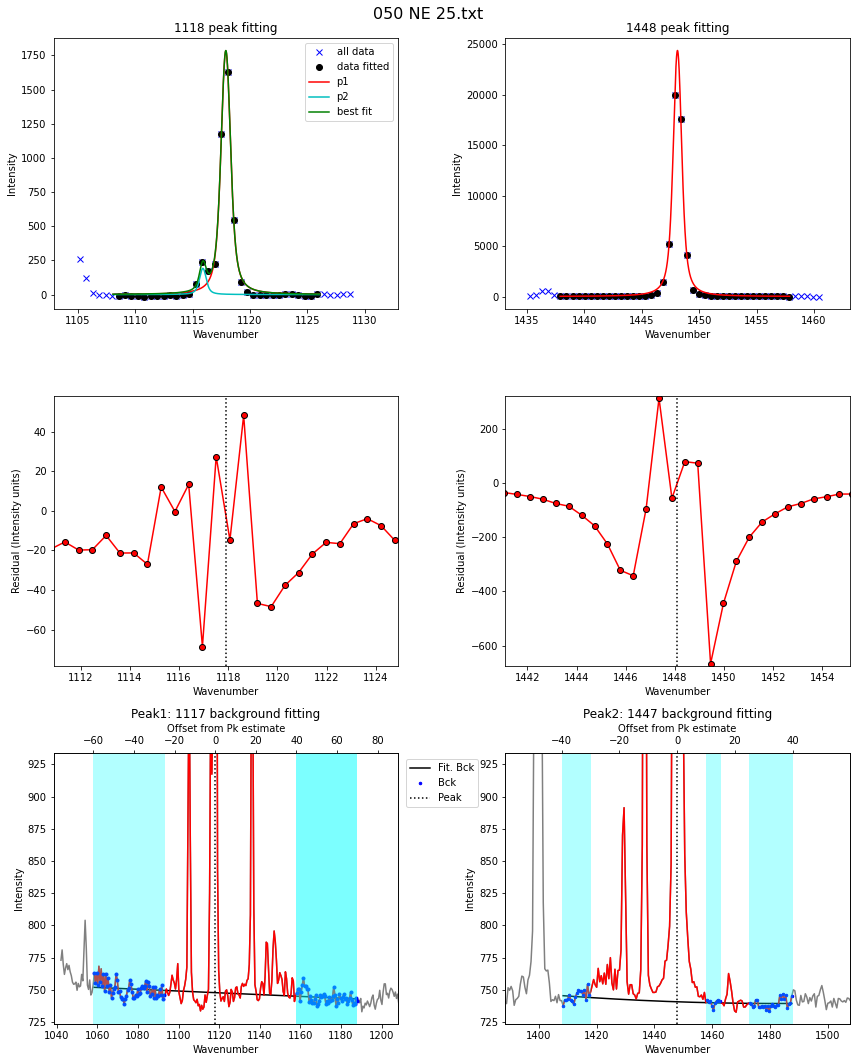

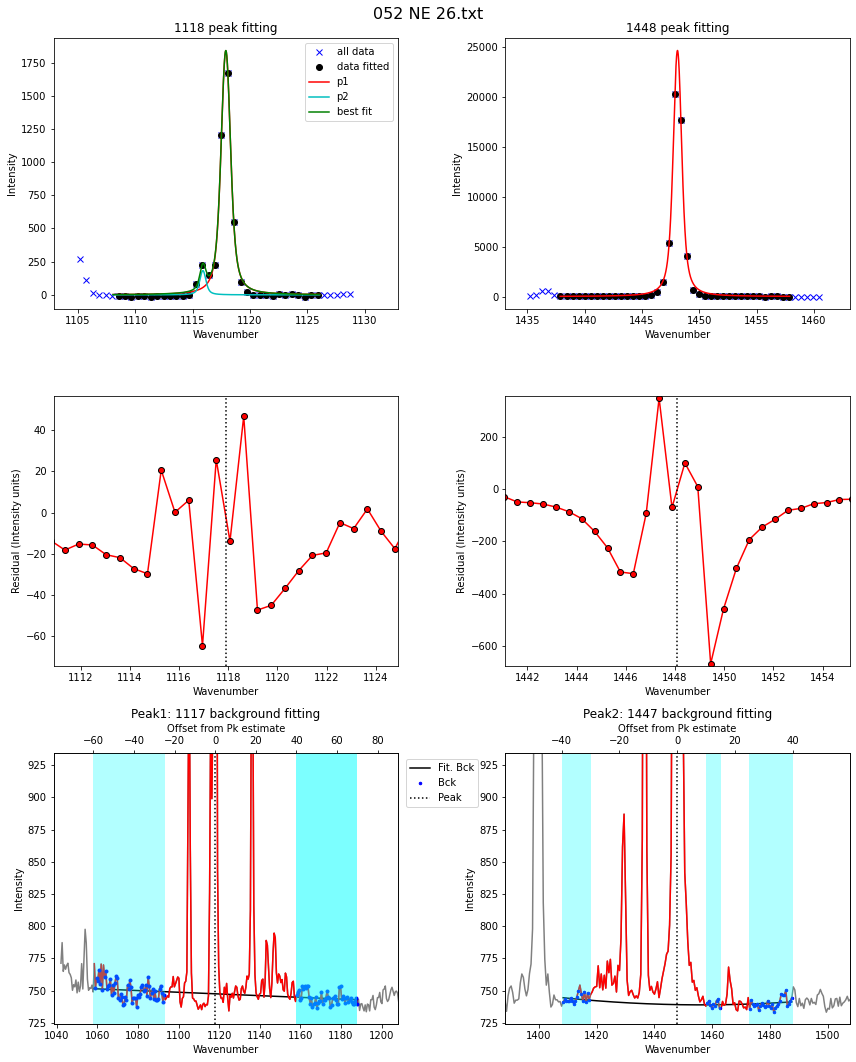

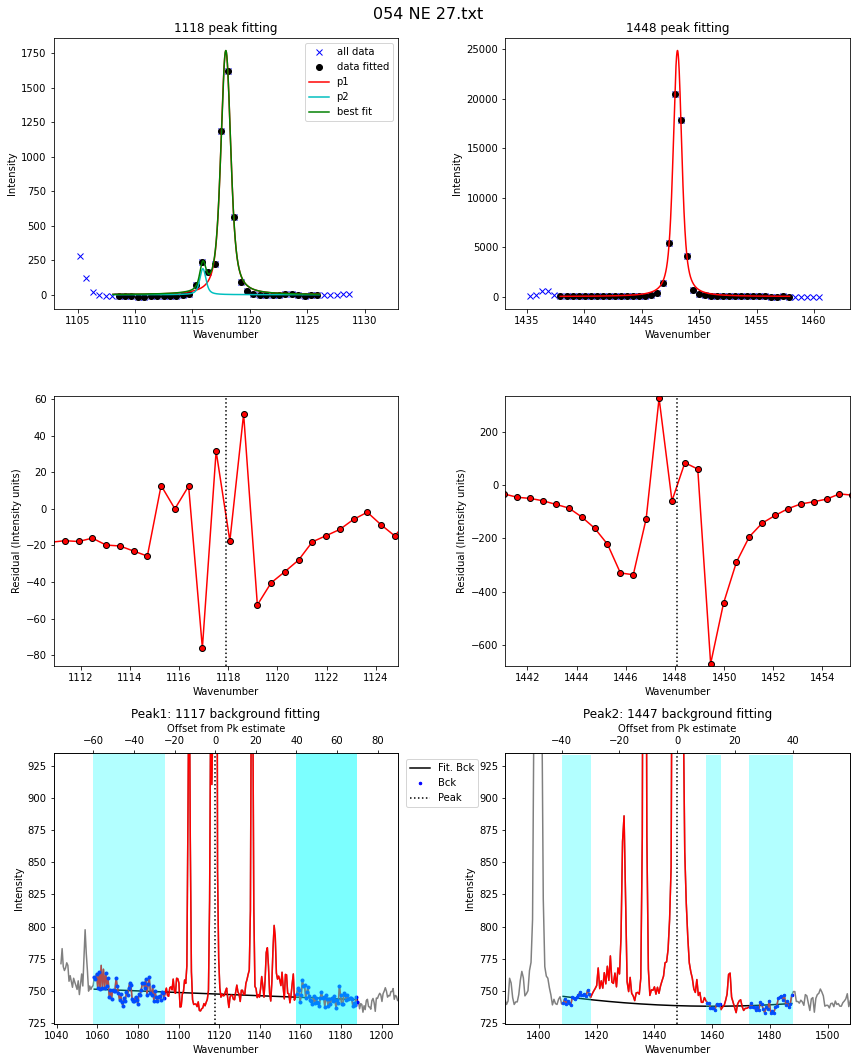

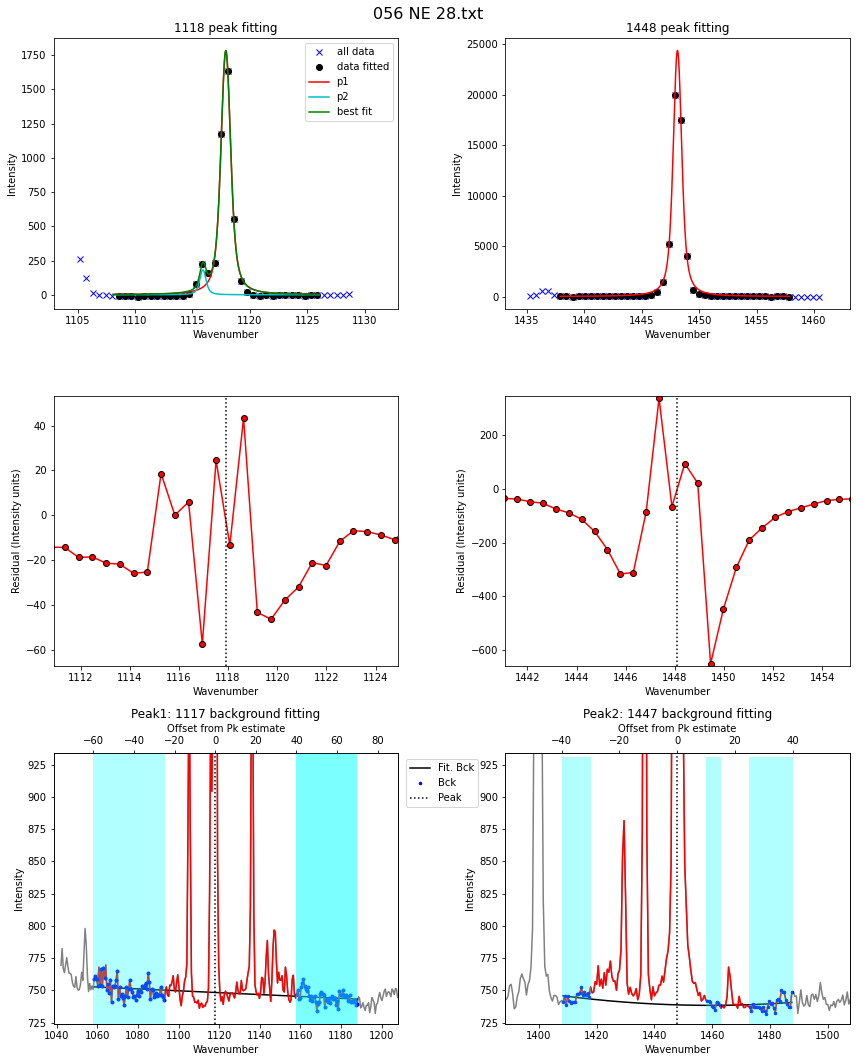

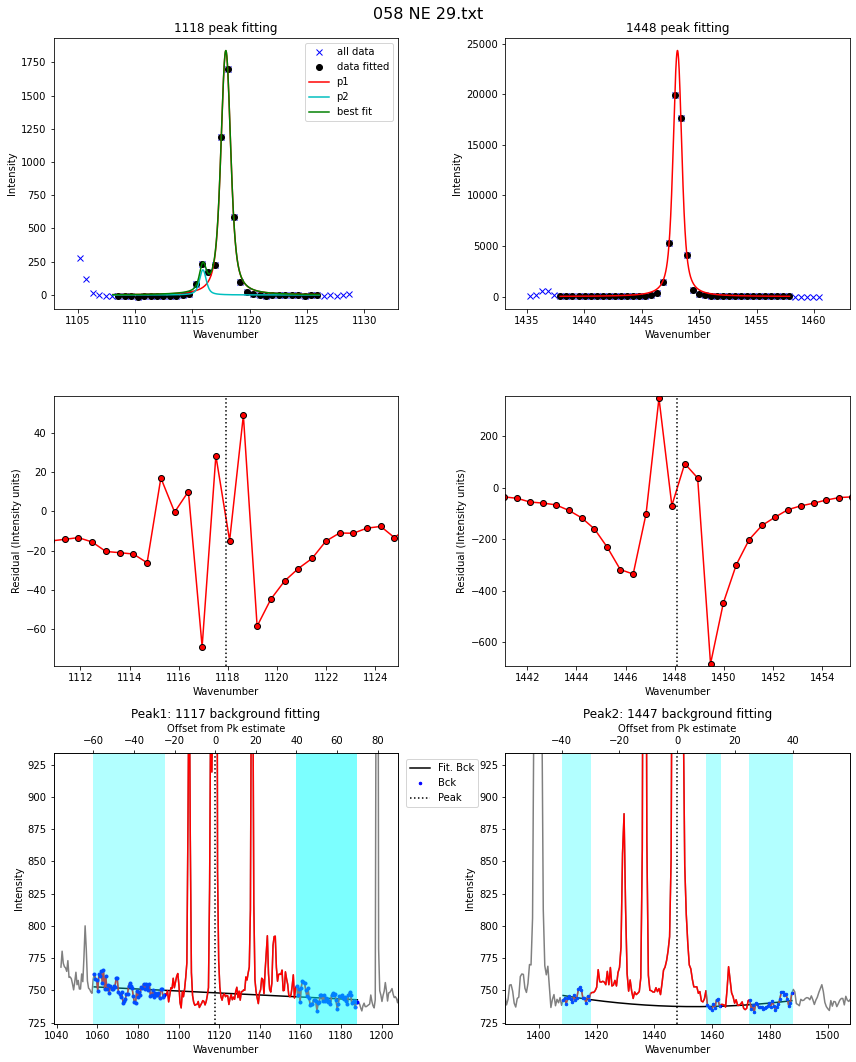

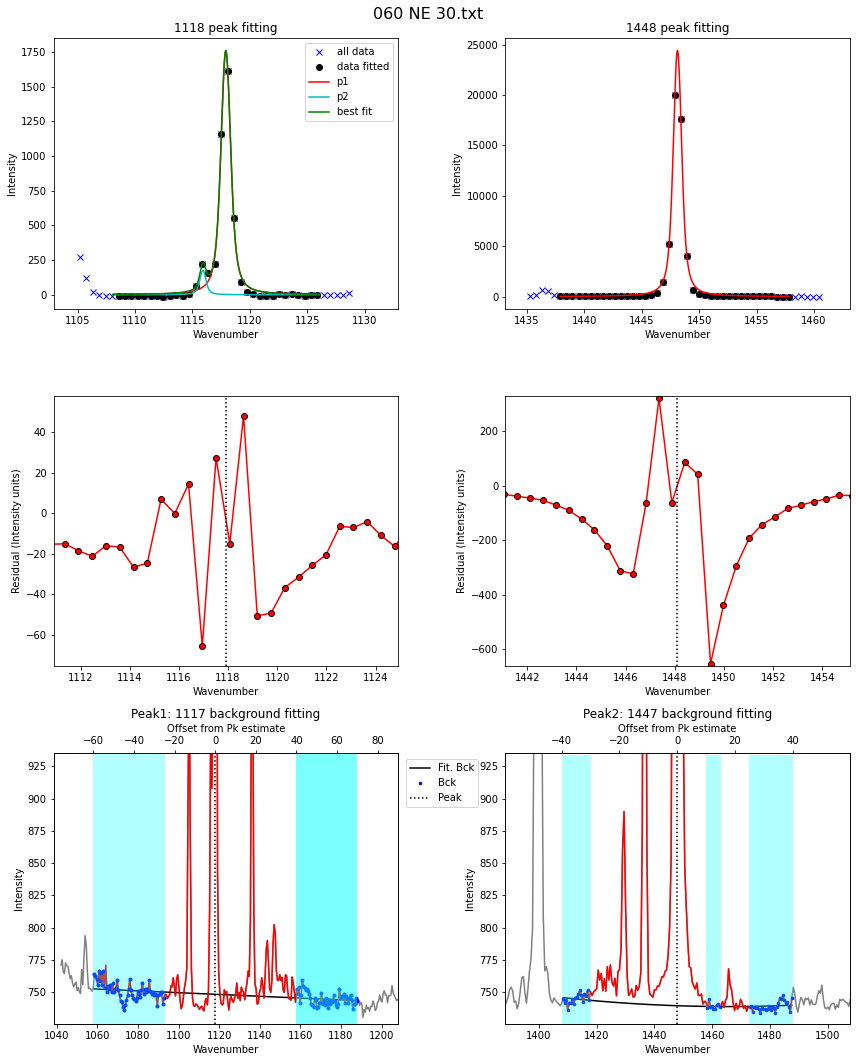

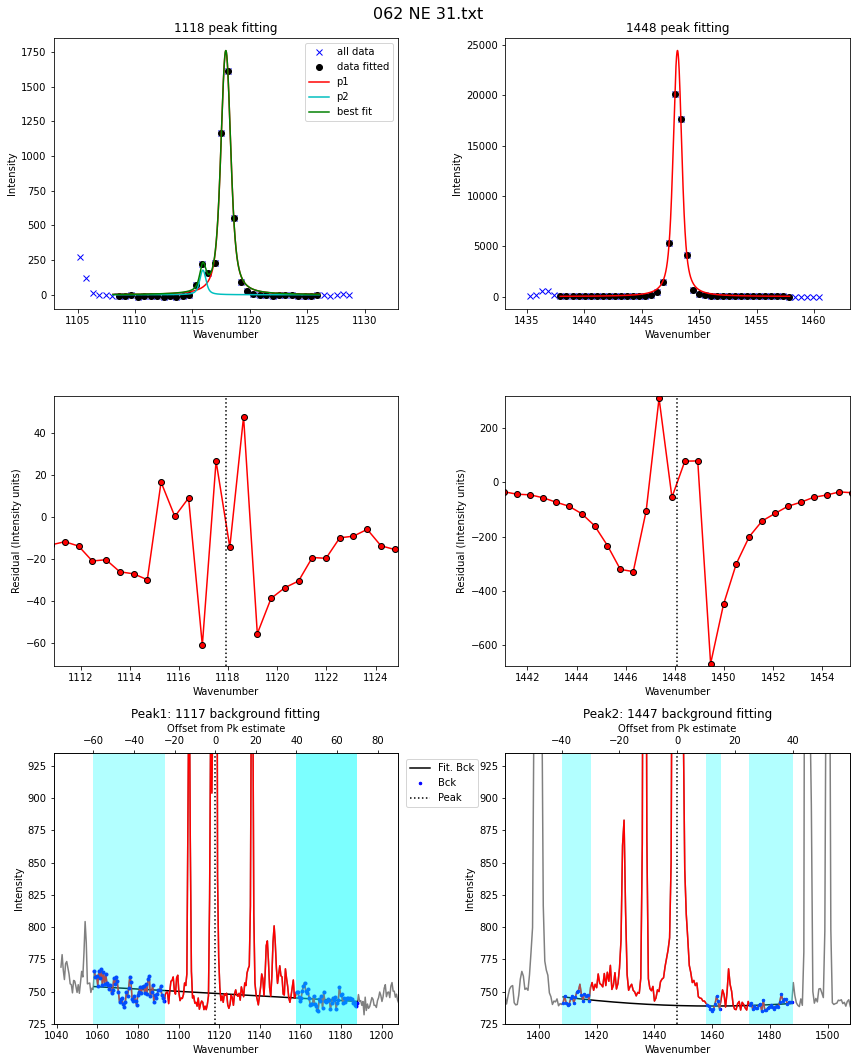

In [17]:
df2=pf.loop_Ne_lines(files=Ne_files, path=spectra_path, filetype=filetype,
                  config=Ne_Config, peaks_1=2, Ne=Ne, Ne_center_1=nearest_pk1,
                  Ne_center_2=nearest_pk2, DeltaNe_ideal=ideal_split['Ne_Split'], 
                  plot_figure=True, save_clipboard=True, single_acq=False)

# If any are weird, can fit again here
- If you refit, you'll have to replace the value in the saved dataframe

In [18]:
# # Which file
# filename2=Ne_files[1]  # Or you could put a string here, like 'NE1.txt' 

# # Tweak fit

# Ne_Config2=pf.Ne_peak_config(amplitude=100, LH_offset_mini=[2, 5], 
# lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80],
# lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
# x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])
# Ne_Config

# # You also need to set whether you want 1 peak or 2 for the LH diad
# peaks_1=2

# df_test=pf.fit_Ne_lines(  
#     config=Ne_Config2, peaks_1=peaks_1,
#     Ne=Ne, filename=filename2, path=spectra_path, prefix=prefix,
#     Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
#     DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
# #config: Ne_peak_config=Ne_peak_config(),

## Stitching meta data with Ne line data

In [19]:
# See what deliminators you have in your metadata file you have just got
print(meta['filename'][0])

NE 1.txt


In [20]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_type='.txt')

file_m

array(['NE 1', 'NE 2', 'NE 3', 'NE 4', 'NE 5', 'NE 6', 'NE 7', 'NE 8',
       'NE 9', 'NE 10', 'NE 11', 'NE 12', 'NE 13', 'NE 14', 'NE 15',
       'NE 16', 'NE 17', 'NE 18', 'NE 19', 'NE 20', 'NE 21', 'NE 22',
       'NE 23', 'NE 24', 'NE 25', 'NE 26', 'NE 27', 'NE 28', 'NE 29',
       'NE 30', 'NE 31', 'NE 32', 'NE 33', 'NE 34', 'NE 35', 'NE 36',
       'NE 37', 'NE 38', 'NE 39', 'NE 40', 'NE 41', 'NE 42', 'NE 43',
       'NE 44', 'NE 45', 'NE 46', 'NE 47', 'NE 48', 'NE 49', 'NE 50',
       'NE 51', 'NE 52', 'NE 53', 'NE 54', 'NE 55', 'NE 56', 'NE 57',
       'NE 58', 'NE 59'], dtype=object)

In [21]:
type(file_m)

numpy.ndarray

In [22]:
# See what file names you have for your actual datafiles
print(df2['filename'][0])

001 NE 1.txt


In [23]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=True, str_prefix=' ',
   file_type='.txt')
file_s

array(['NE 1', 'NE 2', 'NE 3', 'NE 4', 'NE 5', 'NE 6', 'NE 7', 'NE 8',
       'NE 9', 'NE 10', 'NE 11', 'NE 12', 'NE 13', 'NE 14', 'NE 15',
       'NE 16', 'NE 17', 'NE 18', 'NE 19', 'NE 20', 'NE 21', 'NE 22',
       'NE 23', 'NE 24', 'NE 25', 'NE 26', 'NE 27', 'NE 28', 'NE 29',
       'NE 30', 'NE 31'], dtype=object)

## Now combining them

In [24]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect what our Ne correction factors actually look like

In [25]:
help(pf.plot_Ne_corrections)

Help on function plot_Ne_corrections in module DiadFit.ne_lines:

plot_Ne_corrections(df=None, x_axis=None, x_label='index', marker='o', mec='k', mfc='r')
    ## Plot to help inspect which Ne lines to discard



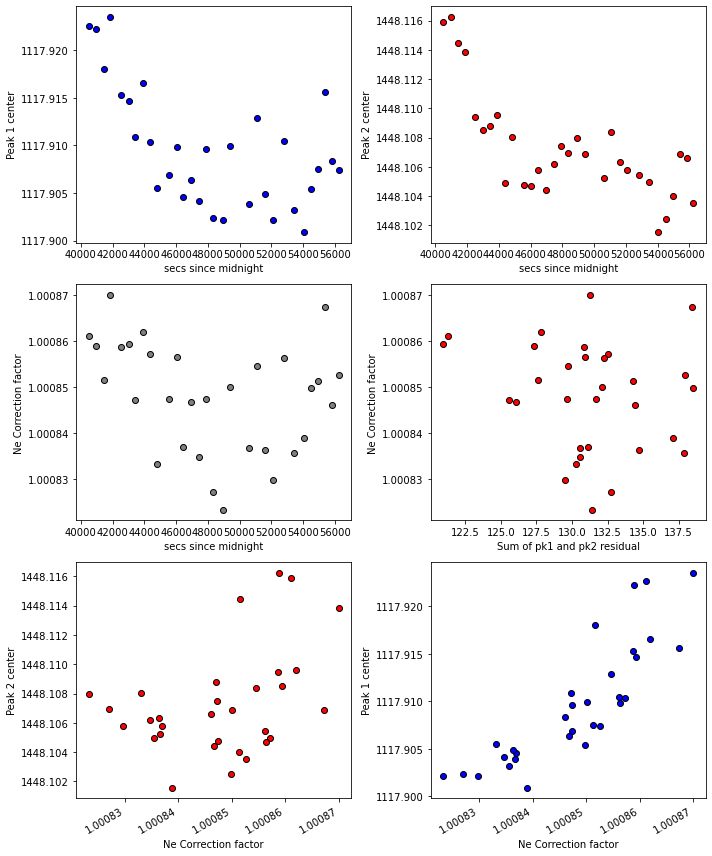

In [26]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')

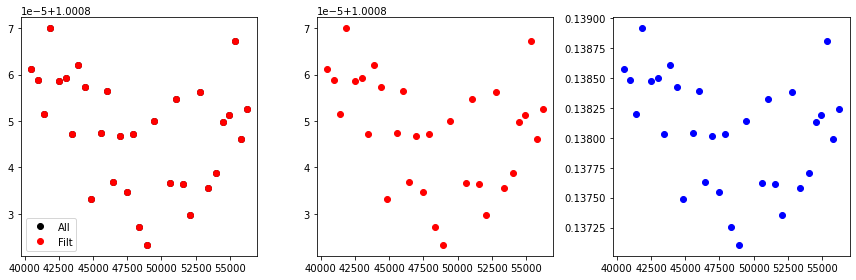

In [27]:
filt=pf.filter_Ne_Line_neighbours(Corr_factor=df_combo['Ne_Corr'], number_av=5, offset=0.0001)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='All')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')
ax1.legend()
ax2.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')

test_split=103
split=filt*test_split
density_test=pf.calculate_density_cornell(temp='SupCrit', Split=split)
ax3.plot(df_combo['sec since midnight'].loc[density_test['Preferred D']>0],
         density_test['Preferred D'].loc[density_test['Preferred D']>0], 'ob')
fig.tight_layout()

In [28]:
df_combo.to_excel('Ne Lines Part 1 09.15.22.xlsx')

In [29]:
df_combo

filename_x  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  \
0    001 NE 1.txt    1448.115895   26474.357007   0.241144   0.241144   
1    003 NE 2.txt    1448.116234   27323.513909   0.241122   0.241122   
2    005 NE 3.txt    1448.114469   27628.156946   0.240586   0.240586   
3    007 NE 4.txt    1448.113863   28119.834123   0.239992   0.239992   
4    009 NE 5.txt    1448.109438   28115.089115   0.241805   0.241805   
5    011 NE 6.txt    1448.108523   26496.286617   0.242944   0.242944   
6    013 NE 7.txt    1448.108773   27498.920975   0.243079   0.243079   
7    015 NE 8.txt    1448.109574   27658.716577   0.242297   0.242297   
8    017 NE 9.txt    1448.104935   28279.199162   0.243169   0.243169   
9   019 NE 10.txt    1448.108042   28229.417486   0.243296   0.243296   
10  021 NE 11.txt    1448.104751   27246.221037   0.245002   0.245002   
11  023 NE 12.txt    1448.104689   27833.461273   0.244855   0.244855   
12  025 NE 13.txt    1448.105813   27759.633089   0.244608   0.244608   
13  027 NE 14.txt    1448.104411   27260.009358   0.244080   0.244080   
14  029 NE 15.txt    1448.106176   27805.331982   0.245071   0.245071   
15  031 NE 16.txt    1448.107463   28213.430956   0.244754   0.244754   
16  033 NE 17.txt    1448.106948   27871.356559   0.246653   0.246653   
17  035 NE 18.txt    1448.107981   27532.815210   0.246014   0.246014   
18  037 NE 19.txt    1448.106881   27835.877511   0.245366   0.245366   
19  040 NE 20.txt    1448.105258   27859.240753   0.245286   0.245286   
20  042 NE 21.txt    1448.108363   28246.149376   0.243998   0.243998   
21  044 NE 22.txt    1448.106328   28090.433501   0.245995   0.245995   
22  046 NE 23.txt    1448.105764   27576.182786   0.246136   0.246136   
23  048 NE 24.txt    1448.105418   28384.107087   0.246389   0.246389   
24  050 NE 25.txt    1448.104970   28818.429935   0.246616   0.246616   
25  052 NE 26.txt    1448.101569   29093.451965   0.246222   0.246222   
26  054 NE 27.txt    1448.102477   29338.647588   0.246399   0.246399   
27  056 NE 28.txt    1448.104007   28767.454860   0.246035   0.246035   
28  058 NE 29.txt    1448.106881   28939.386946   0.248034   0.248034   
29  060 NE 30.txt    1448.106625   28766.972275   0.245856   0.245856   
30  062 NE 31.txt    1448.103558   28949.457254   0.246962   0.246962   

    error_pk2  pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  ...  \
0     0.00325    1117.922601    2496.836472   0.275830   0.275830  ...   
1     0.00334    1117.922203    2496.082383   0.281352   0.281352  ...   
2     0.00333    1117.918017    2544.429892   0.278043   0.278043  ...   
3     0.00334    1117.923491    2465.262356   0.279206   0.279206  ...   
4     0.00342    1117.915331    2525.102559   0.277564   0.277564  ...   
5     0.00339    1117.914643    2508.100014   0.275309   0.275309  ...   
6     0.00342    1117.910856    2507.205792   0.276110   0.276110  ...   
7     0.00335    1117.916555    2513.676319   0.275463   0.275463  ...   
8     0.00346    1117.910362    2503.745802   0.277923   0.277923  ...   
9     0.00345    1117.905507    2486.935429   0.274395   0.274395  ...   
10    0.00355    1117.906935    2524.853619   0.279052   0.279052  ...   
11    0.00355    1117.909836    2481.391737   0.280944   0.280944  ...   
12    0.00355    1117.904536    2501.840782   0.281807   0.281807  ...   
13    0.00350    1117.906355    2526.345353   0.274724   0.274724  ...   
14    0.00355    1117.904150    2461.043390   0.278868   0.278868  ...   
15    0.00351    1117.909599    2505.477540   0.279574   0.279574  ...   
16    0.00354    1117.902404    2536.097669   0.277903   0.277903  ...   
17    0.00353    1117.902194    2506.959943   0.278736   0.278736  ...   
18    0.00351    1117.909942    2483.888251   0.281430   0.281430  ...   
19    0.00349    1117.903900    2429.887384   0.277928   0.277928  ...   
20    0.00342    1117.912923    2432.777388   0.279655   0.279655  ...   
21    0.00359    1117.904860    2381.15538

## Now lets make a regression against time

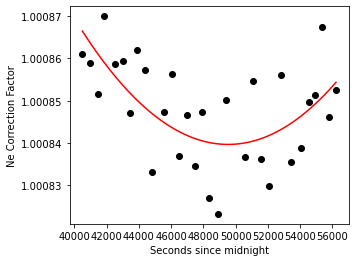

In [30]:
df_combo_filt=df_combo[density_test['Preferred D']>0]
model=pf.reg_Ne_lines_time(df=df_combo_filt, N_poly=2, fit='poly')

## SAving as pickle, can then load as a pickle

In [31]:
import pickle
with open('Ne_Line_Regression_09.15.22_part1.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)

In [32]:
with open('Ne_Line_Regression_09.15.22_part1.pck', 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

## You can then load these pickles into the notebook where you fit your Diad data|